In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set file path
file_path = '../data/Mushroom_25-05-08_0326.lvm'

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File {file_path} does not exist")
else:
    # Read LVM file
    # LVM files are tab-separated text files without header
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Based on file content, we need to name the columns
    # Assuming first column is timestamp, others are sensor data
    columns = ['Timestamp'] + [f'Sensor_{i}' for i in range(1, data.shape[1])]
    data.columns = columns
    
    # 删除最后一列
    data = data.iloc[:, :-1]


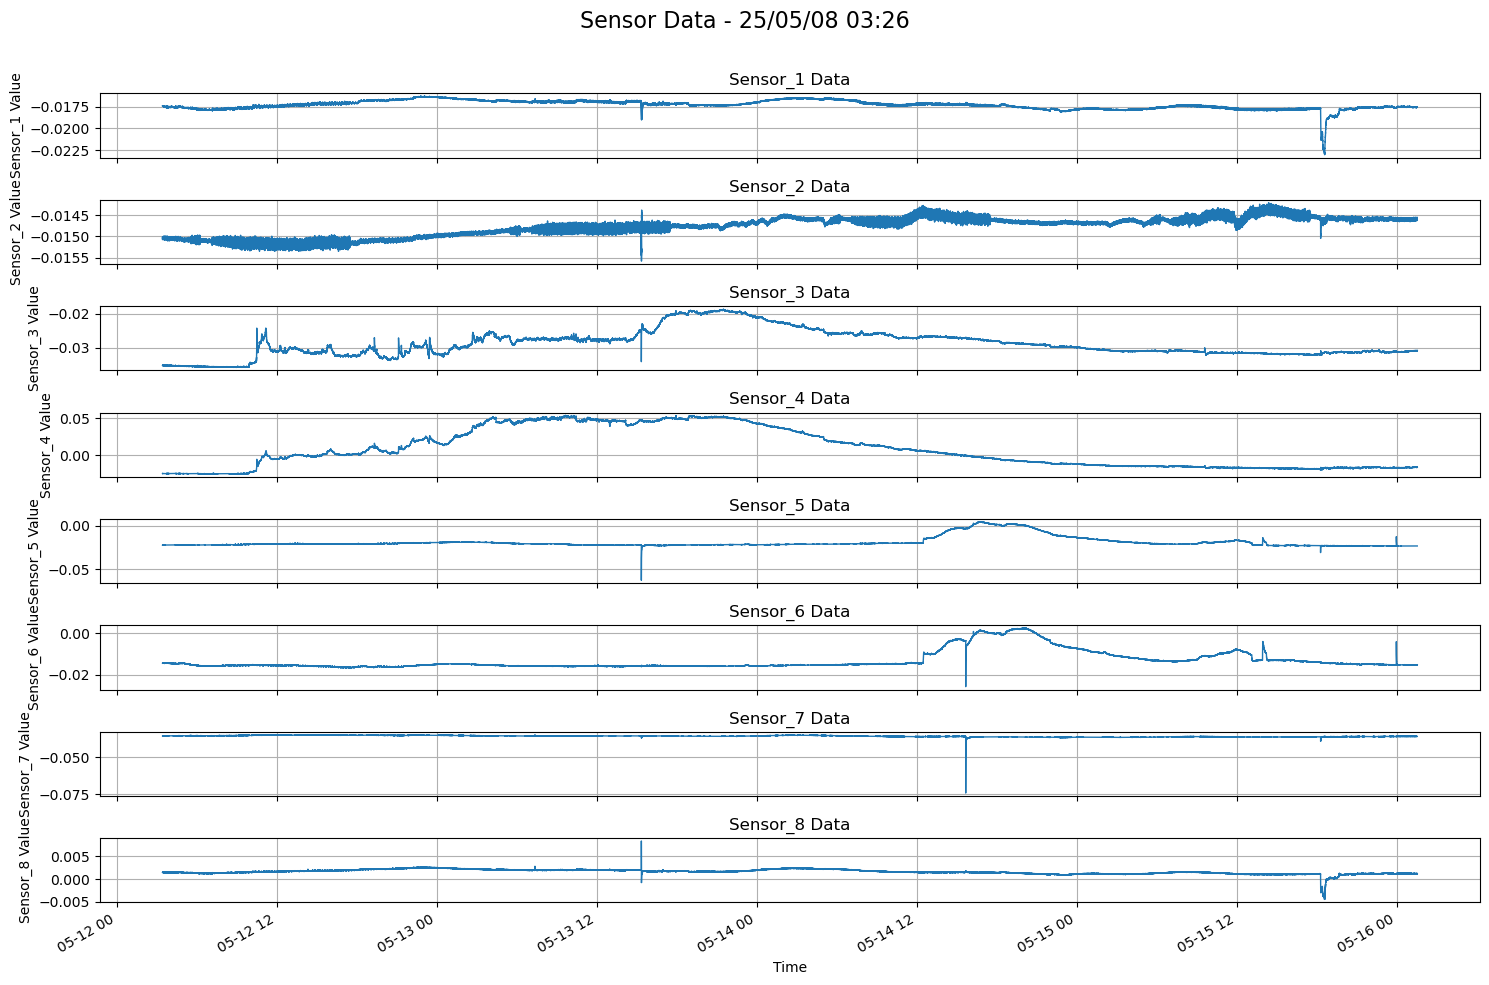

Sensor Statistics:

Sensor_1:
count    1.084420e+06
mean    -1.727884e-02
std      5.048720e-04
min     -2.300700e-02
25%     -1.762500e-02
50%     -1.728600e-02
75%     -1.690600e-02
max     -1.632500e-02
Name: Sensor_1, dtype: float64

Sensor_2:
count    1.084420e+06
mean    -1.481143e-02
std      2.283351e-04
min     -1.557400e-02
25%     -1.504800e-02
50%     -1.476700e-02
75%     -1.461900e-02
max     -1.421000e-02
Name: Sensor_2, dtype: float64

Sensor_3:
count    1.084420e+06
mean    -2.902471e-02
std      4.014688e-03
min     -3.576500e-02
25%     -3.148200e-02
50%     -2.978400e-02
75%     -2.700600e-02
max     -1.869200e-02
Name: Sensor_3, dtype: float64

Sensor_4:
count    1.084420e+06
mean     9.146397e-03
std      2.632990e-02
min     -2.506200e-02
25%     -1.520400e-02
50%      2.054000e-03
75%      3.857700e-02
max      5.387100e-02
Name: Sensor_4, dtype: float64

Sensor_5:
count    1.084420e+06
mean    -1.927404e-02
std      5.577440e-03
min     -6.273700e-02
25%     -2

In [2]:
# Extract date and time information from the filename
file_name = os.path.basename(file_path)  # Get the filename
date_time_str = file_name.split('_')[1:3]  # Extract date and time parts
date_str = date_time_str[0].replace('-', '/')  # Format date
time_str = date_time_str[1].replace('.lvm', '')  # Format time
# Parse time string, first two digits are hours, last two are minutes
hour = time_str[:2]
minute = time_str[2:]
formatted_time = f"{hour}:{minute}"

# Use actual timestamps and convert to specific times
actual_time = data['Timestamp']
# Calculate seconds relative to start time
start_time = actual_time.iloc[0]
relative_seconds = actual_time - start_time

# Create specific time labels
from datetime import datetime, timedelta
# Assume data recording started at the date and time specified in the filename
base_time = datetime(2025, 5, 12, int(hour), int(minute))  # Date and time parsed from filename
time_labels = [base_time + timedelta(seconds=s) for s in relative_seconds]

# Determine the number of sensors in the dataset
num_sensors = len([col for col in data.columns if 'Sensor_' in col])

# Create a figure with subplots for all sensors
plt.figure(figsize=(15, 10))

# Plot data for all sensors
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    plt.subplot(num_sensors, 1, i)
    plt.plot(time_labels, data[sensor_name], linewidth=1)
    plt.title(f'{sensor_name} Data')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    
    # Only add x-label for the bottom subplot
    if i == num_sensors:
        plt.xlabel('Time')
    
    plt.gcf().autofmt_xdate()  # Automatically format x-axis date labels

# Add a main title for the entire figure
plt.suptitle(f'Sensor Data - {date_str} {formatted_time}', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the suptitle

# Display the figure
plt.show()

# Print basic statistics for all sensors
print("Sensor Statistics:")
for i in range(1, num_sensors+1):
    sensor_name = f'Sensor_{i}'
    print(f"\n{sensor_name}:\n{data[sensor_name].describe()}")


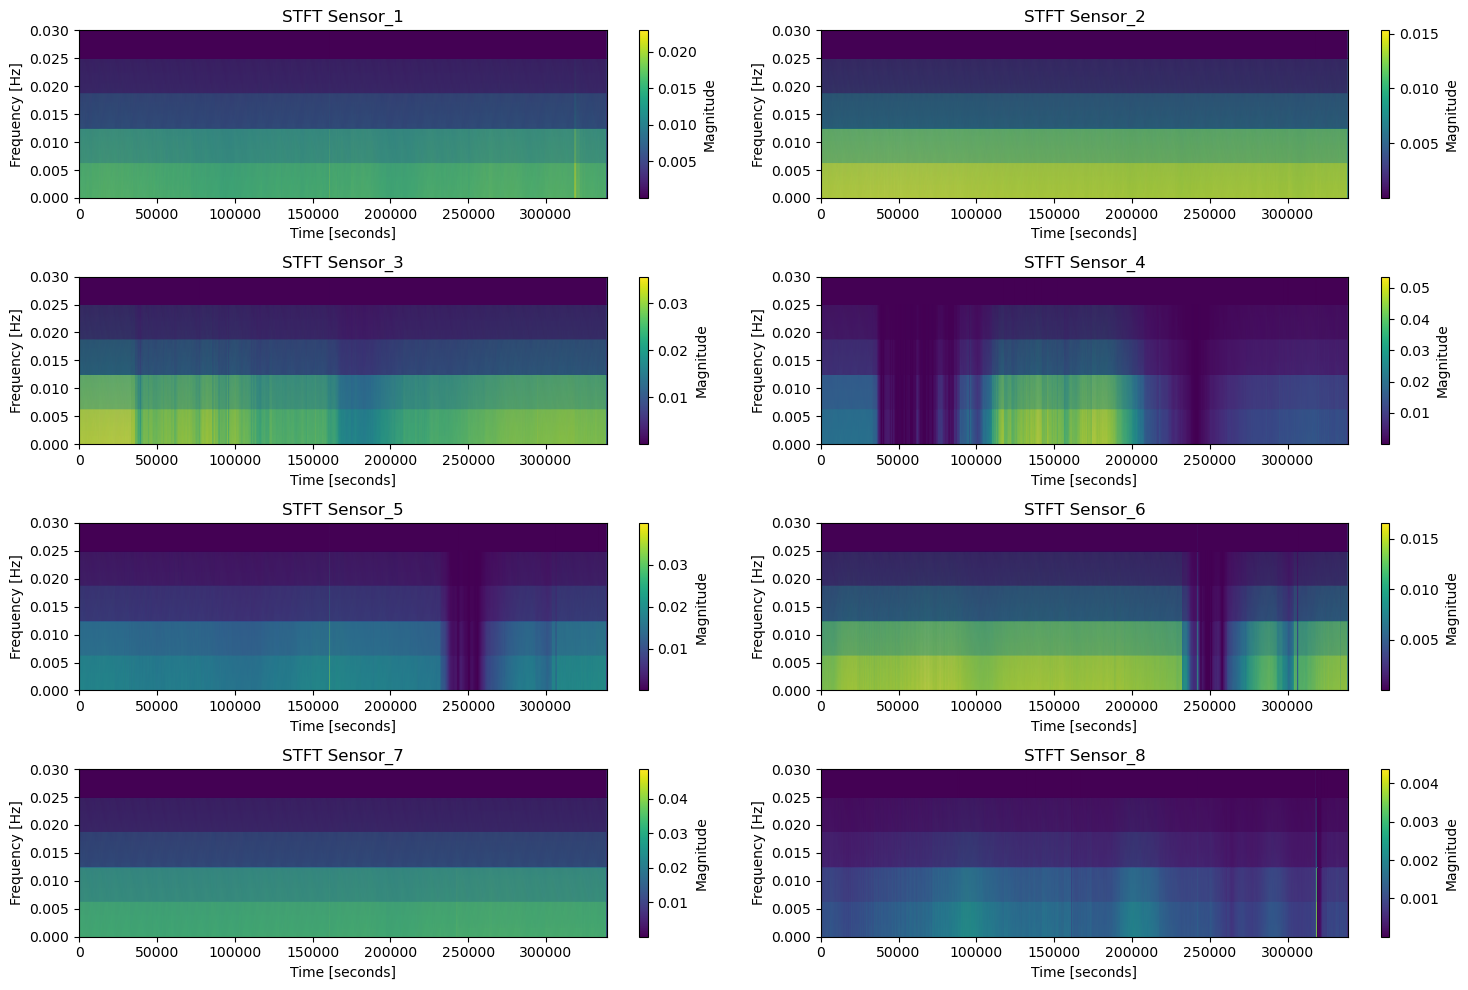

STFT analysis completed
Sampling rate: 3.20 Hz
Frequency resolution: 0.0125 Hz
Time resolution: 39.9933 seconds


In [3]:
# Perform Short-Time Fourier Transform (STFT) analysis
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for STFT analysis
plt.figure(figsize=(15, 10))

# Perform STFT on all sensor data
for i in range(1, 9):  # Assuming 8 sensors
    sensor_name = f'Sensor_{i}'
    
    # Get sensor data
    sensor_data = data[sensor_name].values
    
    # Calculate sampling rate (based on timestamp differences)
    sampling_rate = 1.0 / np.mean(np.diff(data['Timestamp']))
    
    # Perform STFT
    f, t, Zxx = signal.stft(sensor_data, fs=sampling_rate, nperseg=256)
    
    # Plot STFT results
    plt.subplot(4, 2, i)
    
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    plt.title(f'STFT {sensor_name}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seconds]')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)  # Limit y-axis to 0.03Hz

plt.tight_layout()
plt.show()

# Print basic information about the STFT analysis
print(f"STFT analysis completed")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Frequency resolution: {f[1]-f[0]:.4f} Hz")
print(f"Time resolution: {t[1]-t[0]:.4f} seconds")


In [4]:
# Calculate the recording end time based on the timestamp
import datetime
# Extract start time from the filename 
filename = file_path.split('/')[-1]
date_part = filename.split('_')[1]  
time_part = filename.split('_')[2]  

# Handle potential file extension in time_part
if '.' in time_part:
    time_part = time_part.split('.')[0]  # Remove file extension if present

year = 2000 + int(date_part.split('-')[0])  # '25' -> 2025
month = int(date_part.split('-')[1])  # '05' -> 5
day = int(date_part.split('-')[2])  # '08' -> 8
hour = int(time_part[:2])  # '03' -> 3
minute = int(time_part[2:])  # '26' -> 26

start_time = datetime.datetime(year, month, day, hour, minute)

# Get the first and last timestamp
first_timestamp = data['Timestamp'].iloc[0]
last_timestamp = data['Timestamp'].iloc[-1]

# Calculate the duration in seconds
duration_seconds = last_timestamp - first_timestamp

# Calculate the end time
end_time = start_time + datetime.timedelta(seconds=duration_seconds)

# Format and print the results
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Recording end time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total recording duration: {duration_seconds:.2f} seconds ({duration_seconds/60:.2f} minutes)")


Recording start time: 2025-05-08 03:26:00
Recording end time: 2025-05-12 01:33:04
Total recording duration: 338824.48 seconds (5647.07 minutes)


In [5]:
# Parse the event time string
event_time_str = "2025-05-11T19:42:43.821Z"
# Time window for analysis
window_minutes = 15

In [6]:
# Function to find the closest timestamp in the data to a given event time
import pytz
import datetime

event_time = datetime.datetime.strptime(event_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
event_time = event_time.replace(tzinfo=pytz.UTC)  # Make it timezone-aware

# Make start_time timezone-aware as well
start_time = start_time.replace(tzinfo=pytz.UTC)

# Calculate seconds elapsed since recording start
elapsed_seconds = (event_time - start_time).total_seconds()

print(f"Event time: {event_time_str}")
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S %Z')}")
print(f"Seconds elapsed since recording start: {elapsed_seconds:.2f} seconds")

# Get the first timestamp from the data
first_timestamp = data['Timestamp'].iloc[0]

# Calculate the target timestamp by adding elapsed seconds to the first timestamp
target_timestamp = first_timestamp + elapsed_seconds

# Find the closest timestamp in the data
closest_idx = (data['Timestamp'] - target_timestamp).abs().idxmin()
closest_timestamp = data['Timestamp'].iloc[closest_idx]
closest_time_diff = abs(closest_timestamp - target_timestamp)

print(f"First data timestamp: {first_timestamp:.2f} seconds")
print(f"Target timestamp: {target_timestamp:.2f} seconds")
print(f"Closest data timestamp: {closest_timestamp:.2f} seconds")
print(f"Difference from target: {closest_time_diff:.2f} seconds")

# Extract the data at the closest timestamp
event_data = data.iloc[closest_idx]
print("\nSensor readings at event time:")
for column in data.columns:
    if column != 'Timestamp':
        print(f"{column}: {event_data[column]}")


Event time: 2025-05-11T19:42:43.821Z
Recording start time: 2025-05-08 03:26:00 UTC
Seconds elapsed since recording start: 317803.82 seconds
First data timestamp: 120386.54 seconds
Target timestamp: 438190.36 seconds
Closest data timestamp: 438190.33 seconds
Difference from target: 0.02 seconds

Sensor readings at event time:
Sensor_1: -0.017834
Sensor_2: -0.014572
Sensor_3: -0.03134
Sensor_4: -0.017413
Sensor_5: -0.023004
Sensor_6: -0.014572
Sensor_7: -0.03621
Sensor_8: 0.001228


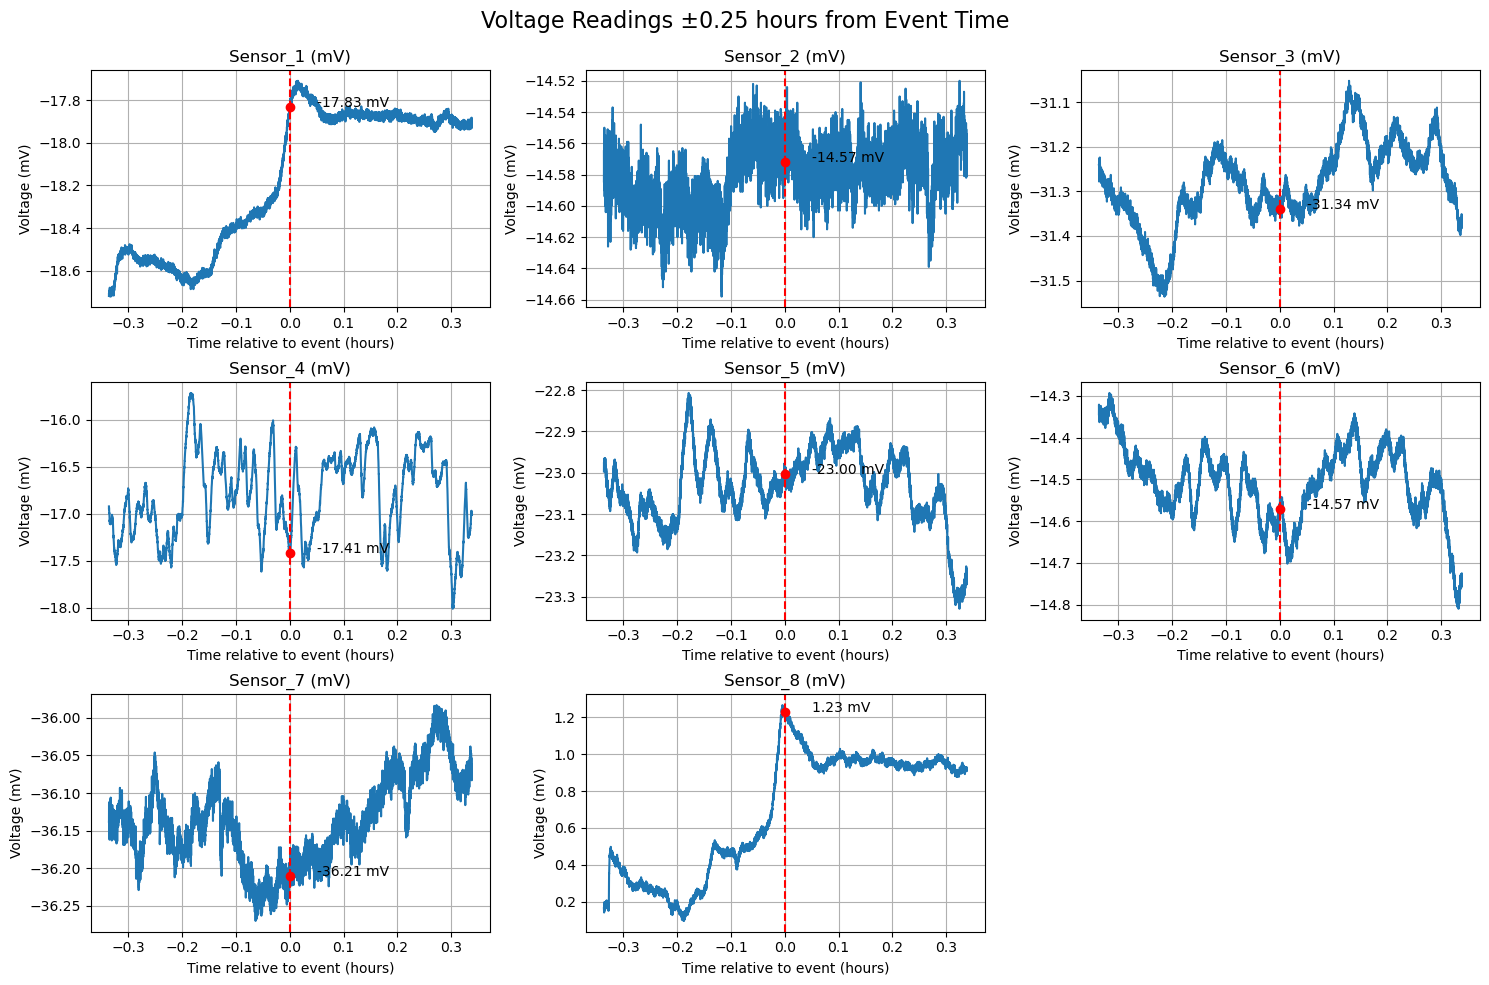

In [7]:
# Plot voltage data for 10 minutes before and after the event time
import matplotlib.pyplot as plt
import numpy as np

# Define the time window (given minutes before and after the event)
window_seconds = window_minutes * 60  # Convert minutes to seconds
event_idx = closest_idx
start_idx = max(0, event_idx - int(window_seconds * data['Timestamp'].diff().median() ** -1))
end_idx = min(len(data) - 1, event_idx + int(window_seconds * data['Timestamp'].diff().median() ** -1))

# Extract the data for the time window
window_data = data.iloc[start_idx:end_idx+1]

# Calculate time relative to the event (in seconds)
relative_time = window_data['Timestamp'] - closest_timestamp

# Convert seconds to hours
relative_time_hours = relative_time / 3600  # Convert to hours

# Create a figure with subplots for each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Convert voltage to millivolts
    voltage_mv = window_data[column] * 1000  # Convert to mV
    
    plt.plot(relative_time_hours, voltage_mv)
    plt.axvline(x=0, color='r', linestyle='--', label='Event time')
    plt.title(f'{column} (mV)')
    plt.xlabel('Time relative to event (hours)')
    plt.ylabel('Voltage (mV)')
    plt.grid(True)
    
    # Add a red dot at the event time point
    event_value_mv = event_data[column] * 1000  # Convert to mV
    plt.plot(0, event_value_mv, 'ro', markersize=6)  # Red dot at event time
    plt.text(0.05, event_value_mv, f'{event_value_mv:.2f} mV')  # Text label without arrow

plt.tight_layout()
plt.suptitle(f'Voltage Readings ±{window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


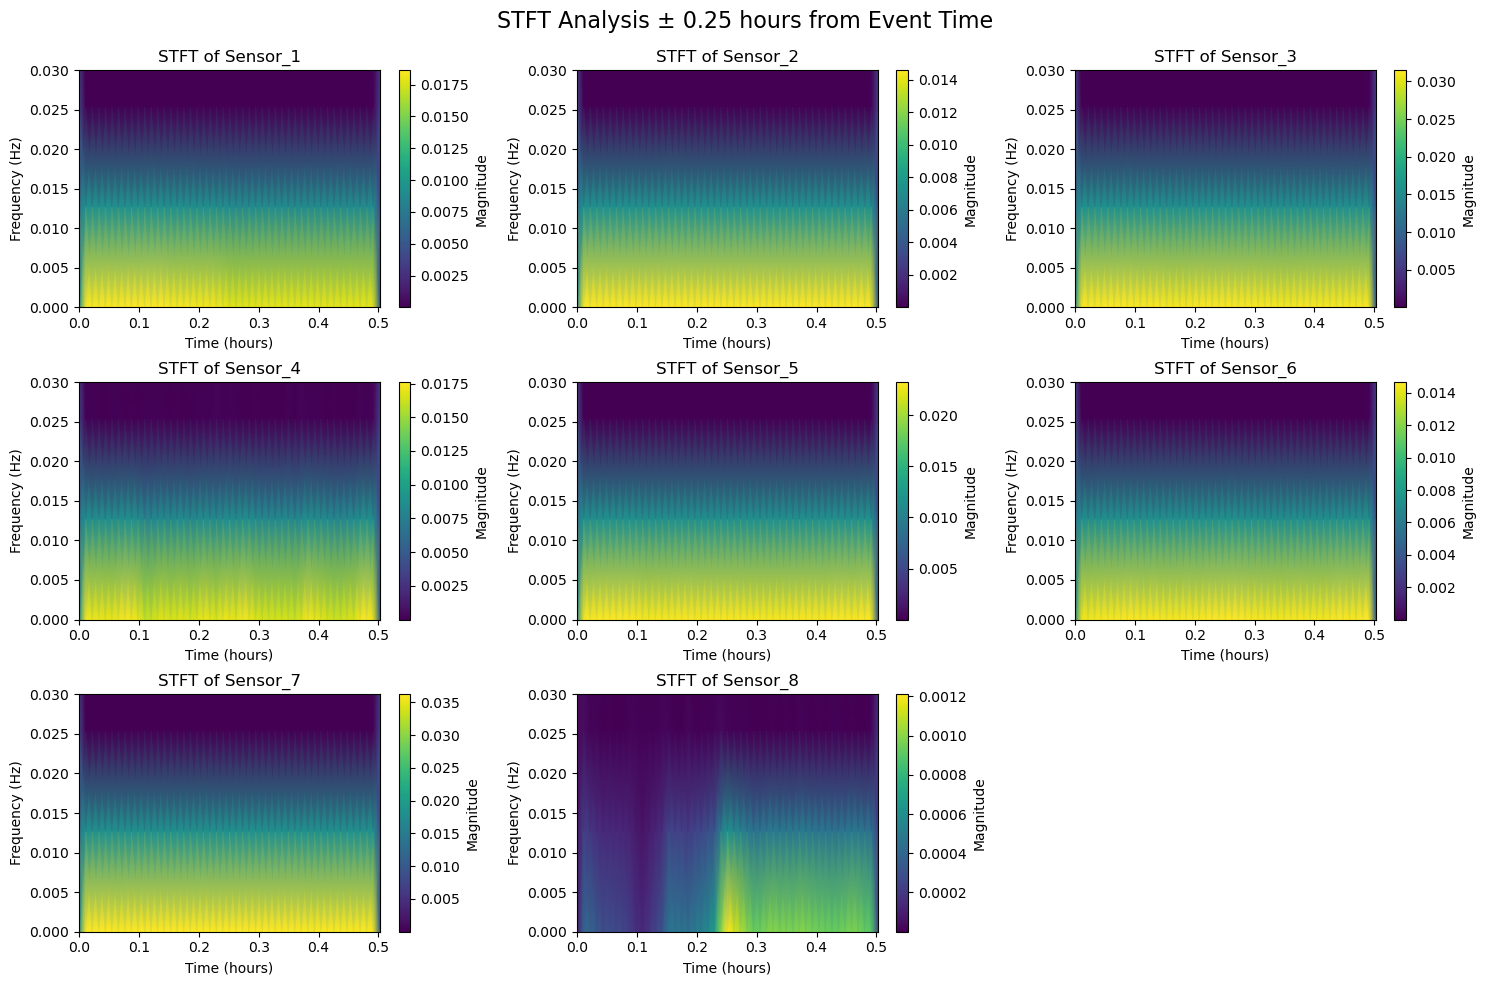

In [8]:
# Perform Short-Time Fourier Transform (STFT) analysis for each voltage channel
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Create a figure with subplots for STFT of each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Get voltage data for this channel
    voltage_data = window_data[column].values
    
    # Perform STFT
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Convert time from seconds to hours
    t_hours = t / 3600
    
    # Plot the STFT magnitude (in dB)
    plt.pcolormesh(t_hours, f, np.abs(Zxx), shading='gouraud')
    
    # Mark the event time
    event_idx = np.argmin(np.abs(t_hours))
    plt.axvline(x=t_hours[event_idx], color='r', linestyle='--', label='event time')
    
    plt.title(f'STFT of {column}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (hours)')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)
    
plt.tight_layout()
plt.suptitle(f'STFT Analysis ± {window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()



=== Analysis for Sensor_1 ===
Analyzing frequency: 0.0127 Hz (closest to 0.0127218279707093 Hz)
Average magnitude before event: 0.0092
Average magnitude after event: 0.0088
Change: -0.0004 (-4.39%)


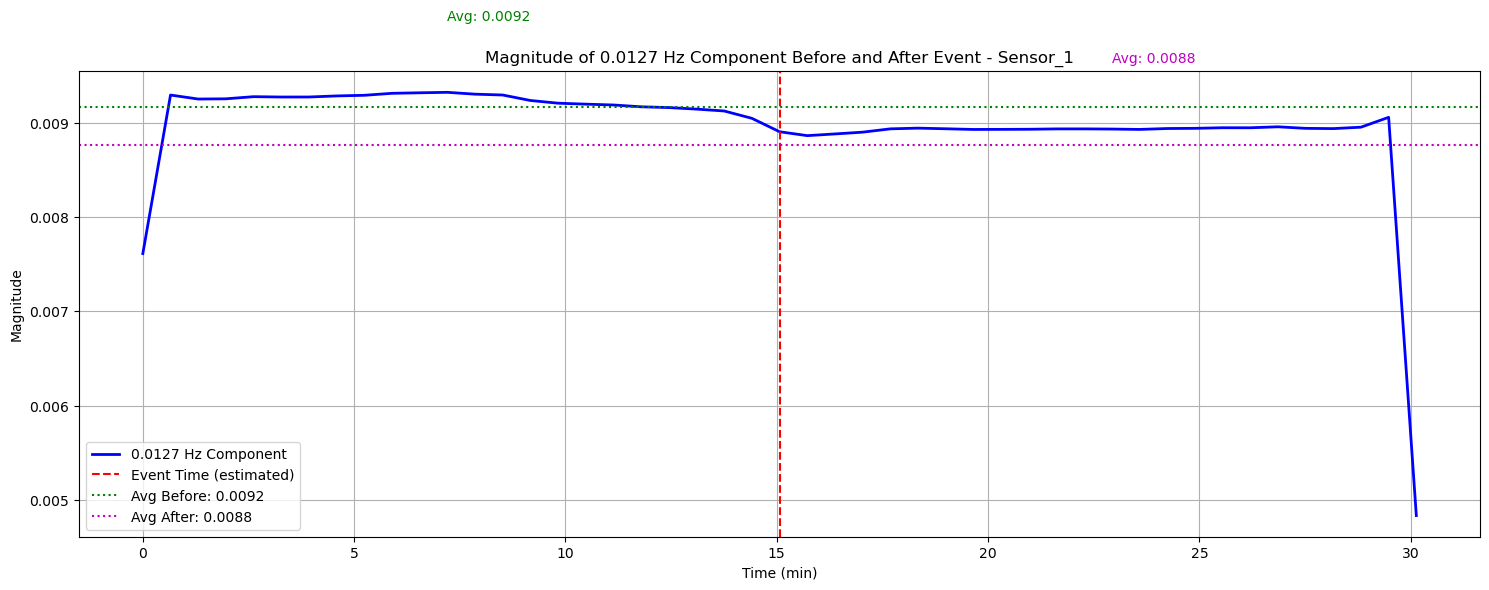


Energy Analysis:
Total energy before event: 0.0019
Total energy after event: 0.0019
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-7.92%)


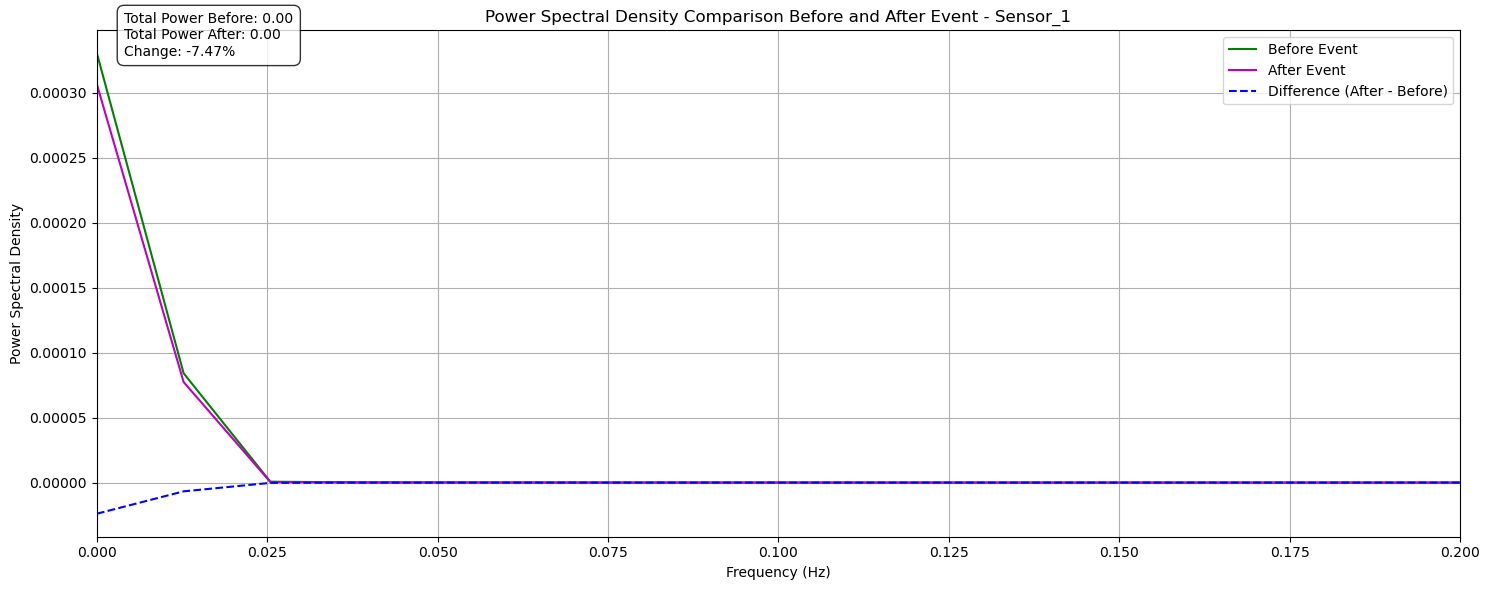


Power Spectral Density Analysis:
Total power before event: 0.0004
Total power after event: 0.0004
Absolute power change: -0.0000
Relative power change: -7.47%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  3.304962e-04  3.065361e-04    -2.396008e-05       -7.249726
1     0.012722  8.418591e-05  7.744044e-05    -6.745476e-06       -8.012585
3     0.038165  1.712667e-07  1.501831e-07    -2.108364e-08      -12.303229
105   1.335792  2.488826e-10  1.946058e-10    -5.427682e-11      -15.557331
128   1.628394  2.274384e-10  1.762769e-10    -5.116148e-11      -15.624766

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  1.096522e-07  7.379303e-08    -3.585920e-08      -32.672868
2    0.025444  6.853350e-07  4.666601e-07    -2.186749e-07      -31.903085
6    0.076331  4.528638e-08  3.264830e-08    -1.263808e-08     

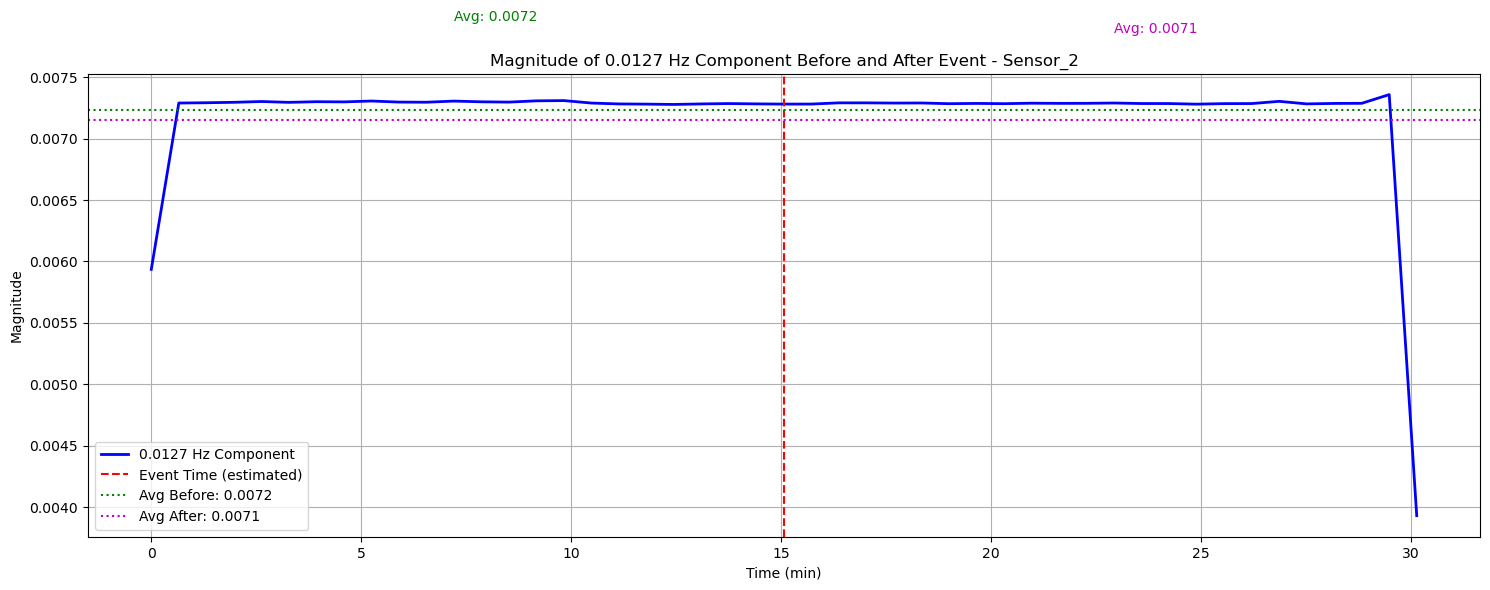


Energy Analysis:
Total energy before event: 0.0012
Total energy after event: 0.0012
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-1.62%)


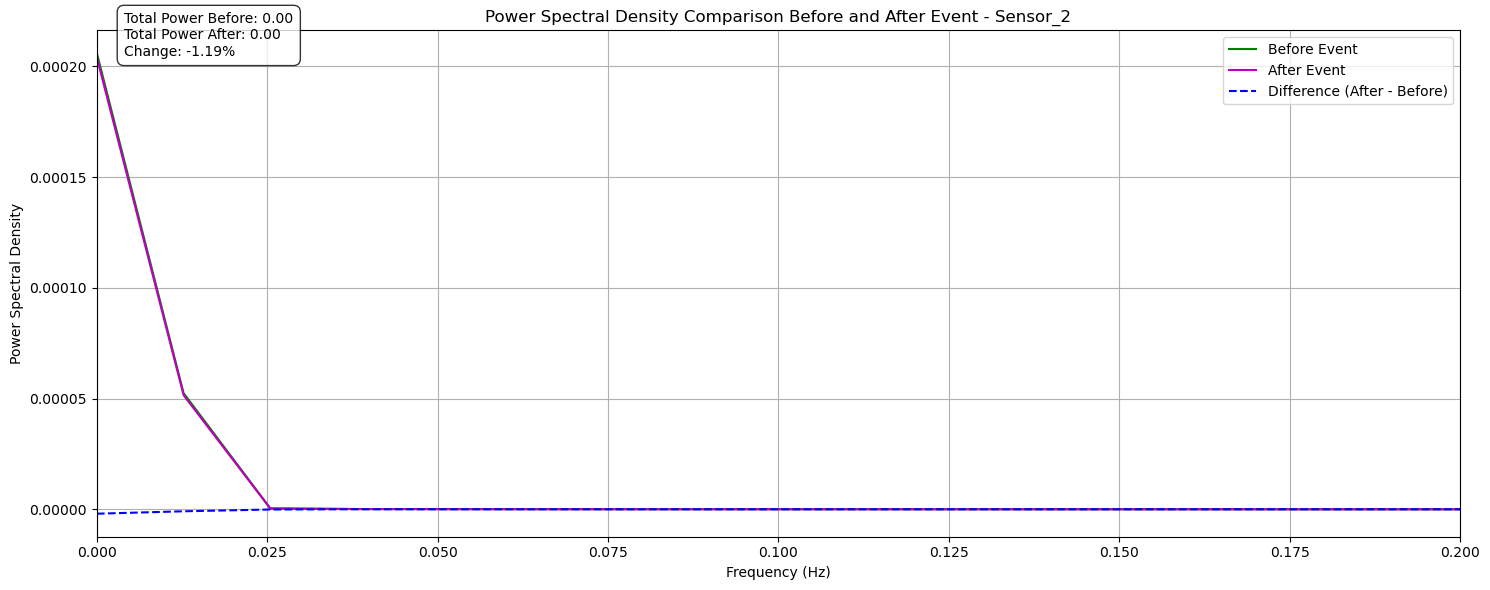


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -1.19%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.059051e-04  2.038972e-04    -2.007912e-06       -0.975164
1     0.012722  5.242189e-05  5.150880e-05    -9.130936e-07       -1.741814
3     0.038165  1.039084e-07  9.936146e-08    -4.546943e-09       -4.371707
115   1.463010  1.406372e-10  1.209085e-10    -1.972869e-11       -8.198522
116   1.475732  1.412000e-10  1.198590e-10    -2.134099e-11       -8.847842

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  6.655315e-08  4.883423e-08    -1.771892e-08      -26.583768
2    0.025444  4.158319e-07  3.084654e-07    -1.073665e-07      -25.813481
6    0.076331  2.754151e-08  2.157037e-08    -5.971138e-09     

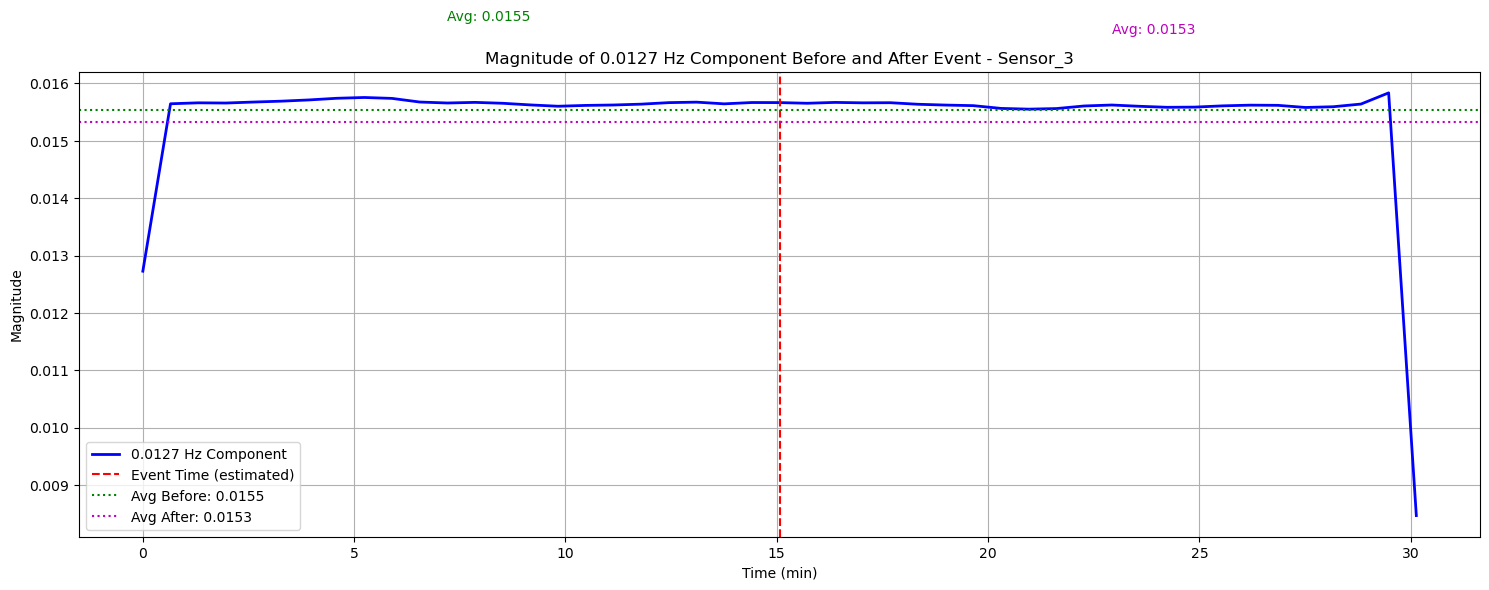


Energy Analysis:
Total energy before event: 0.0056
Total energy after event: 0.0057
Average energy before event: 0.0002
Average energy after event: 0.0002
Energy change: -0.0000 (-2.03%)


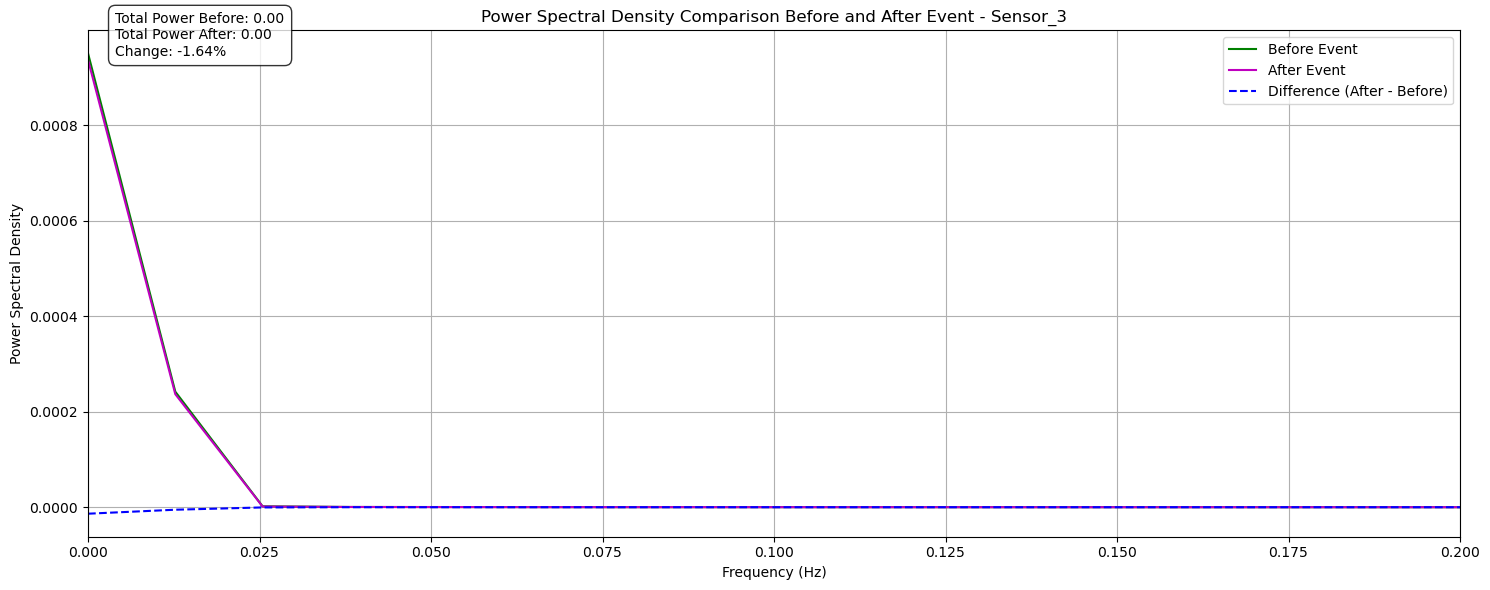


Power Spectral Density Analysis:
Total power before event: 0.0012
Total power after event: 0.0012
Absolute power change: -0.0000
Relative power change: -1.64%

Top 5 frequencies with largest power increase:
    Frequency        Before         After  Absolute_Change  Percent_Change
0    0.000000  9.500632e-04  9.364533e-04    -1.360990e-05       -1.432525
1    0.012722  2.418742e-04  2.365984e-04    -5.275818e-06       -2.181223
3    0.038165  4.778444e-07  4.609945e-07    -1.684988e-08       -3.525490
5    0.063609  1.720566e-07  1.561406e-07    -1.591601e-08       -9.245075
99   1.259461  7.247819e-10  6.212490e-10    -1.035328e-10      -12.552755

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  3.057998e-07  2.262772e-07    -7.952260e-08      -25.996294
2    0.025444  1.912388e-06  1.432168e-06    -4.802202e-07      -25.109707
6    0.076331  1.265167e-07  1.000351e-07    -2.648167e-08      -20.9

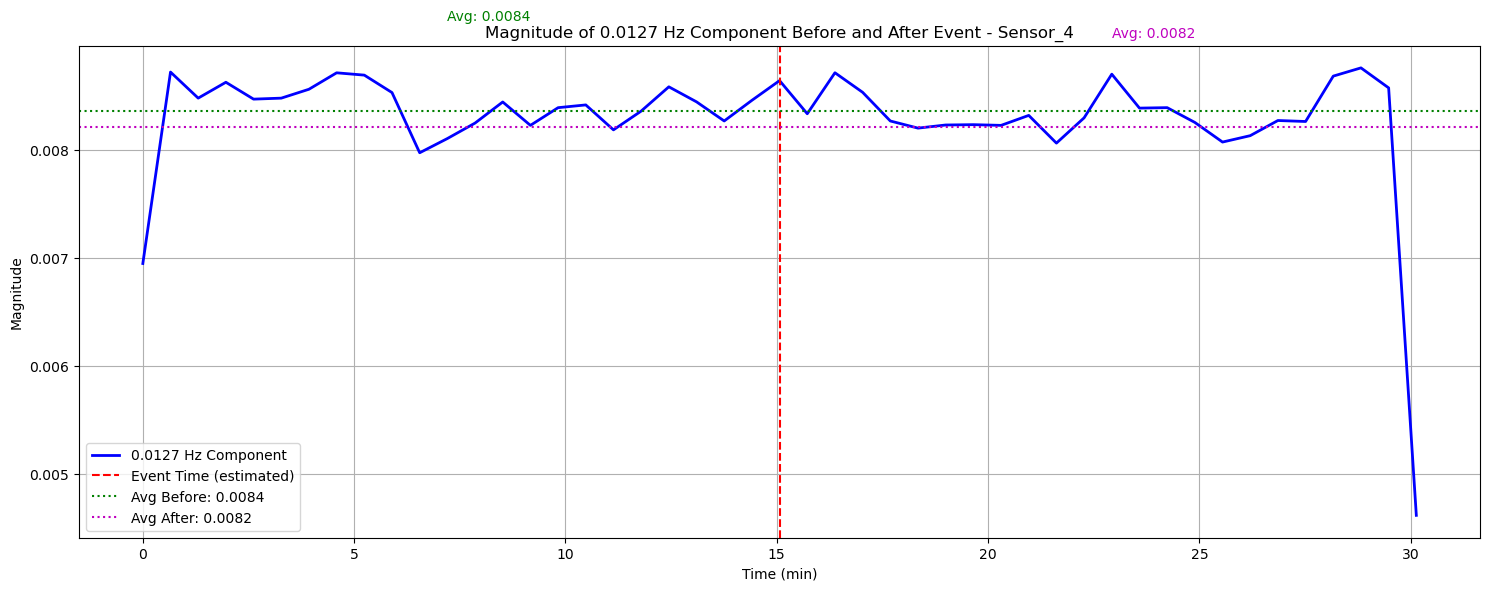


Energy Analysis:
Total energy before event: 0.0016
Total energy after event: 0.0016
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-2.79%)


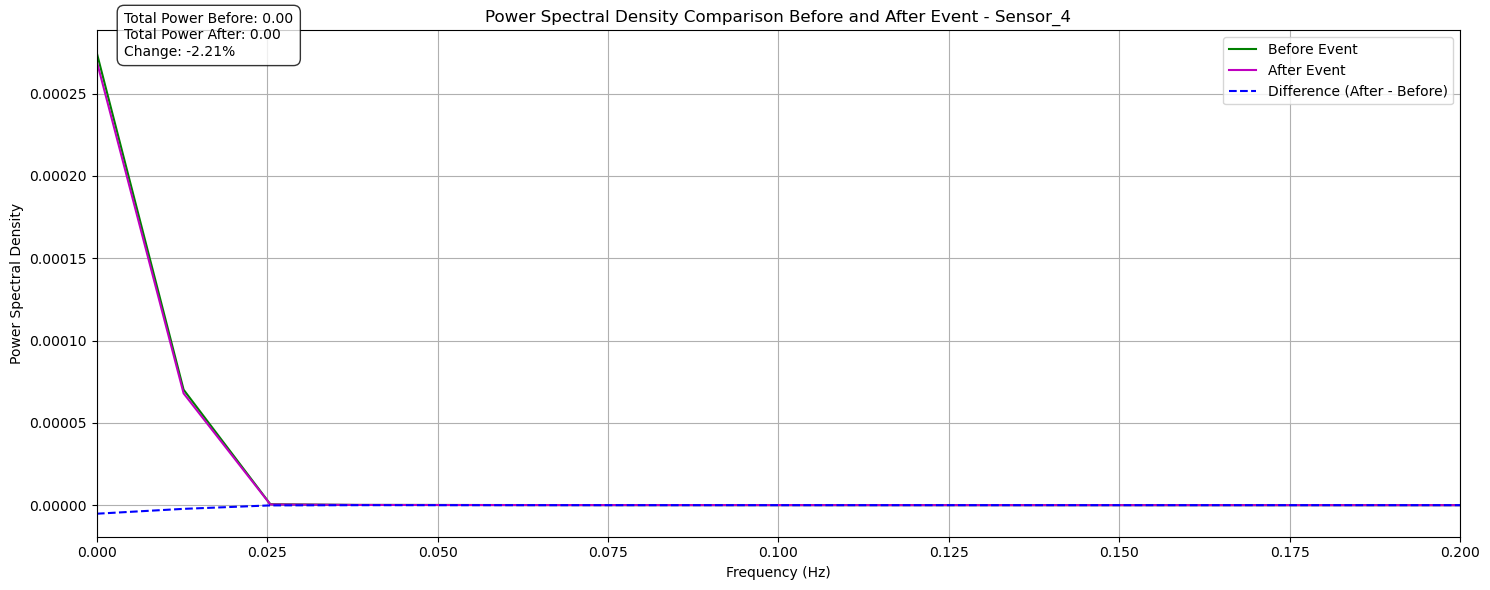


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -2.21%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.744455e-04  2.692575e-04    -5.187974e-06       -1.890347
1     0.012722  7.013201e-05  6.789110e-05    -2.240914e-06       -3.195276
3     0.038165  1.453456e-07  1.381227e-07    -7.222970e-09       -4.966096
103   1.310348  2.054713e-10  1.769006e-10    -2.857074e-11       -9.353001
122   1.552063  1.896529e-10  1.622676e-10    -2.738522e-11       -9.454498

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  9.296743e-08  6.623624e-08    -2.673119e-08      -28.722390
2    0.025444  5.751999e-07  4.355764e-07    -1.396234e-07      -24.269675
6    0.076331  3.714541e-08  2.912783e-08    -8.017580e-09     

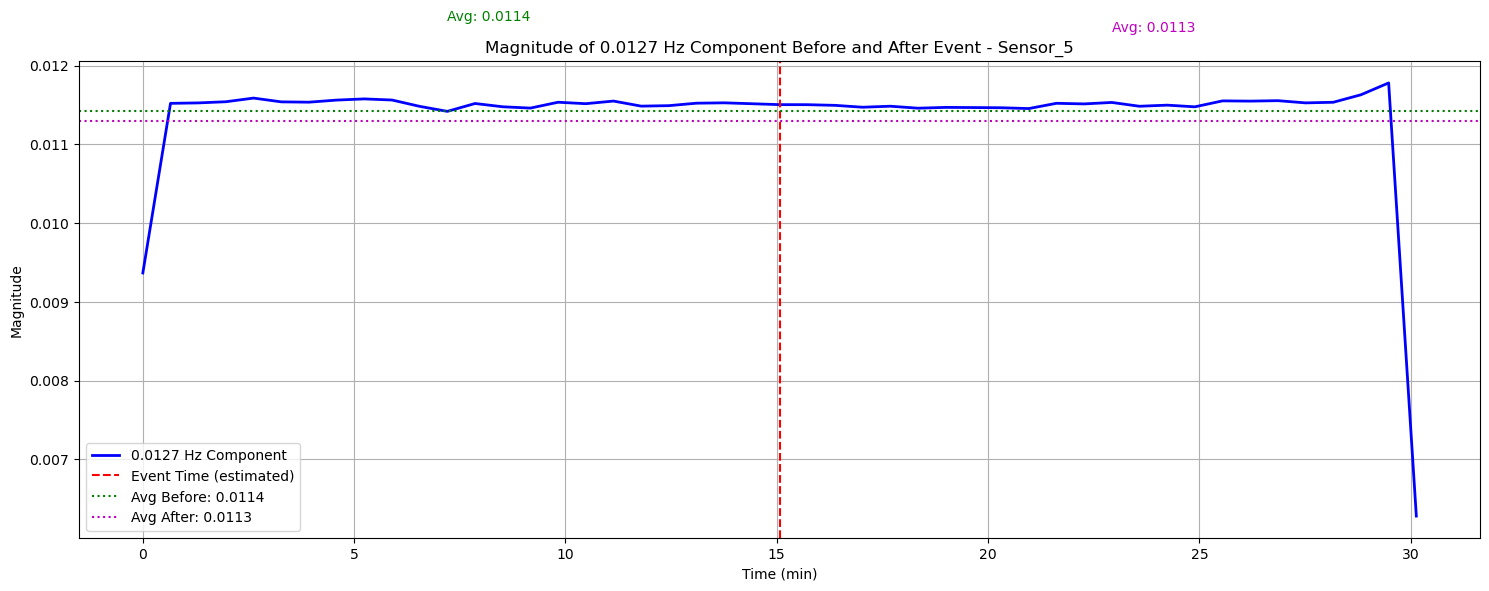


Energy Analysis:
Total energy before event: 0.0030
Total energy after event: 0.0031
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-1.51%)


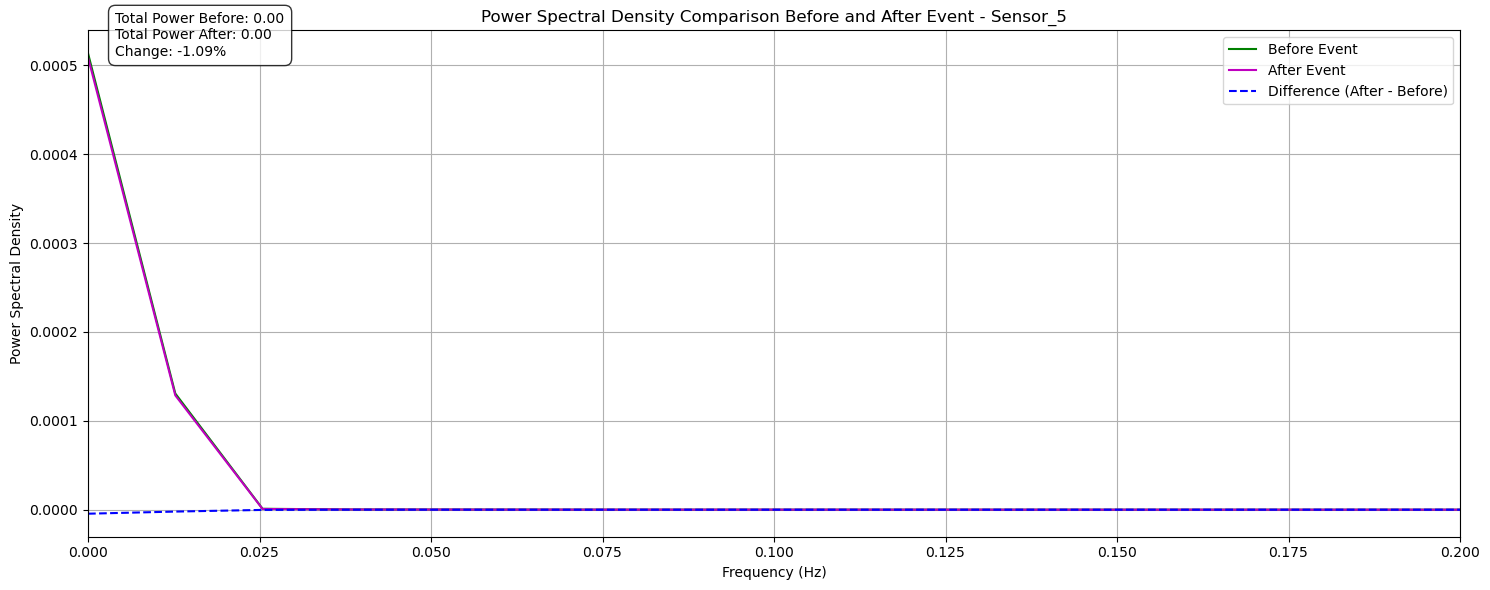


Power Spectral Density Analysis:
Total power before event: 0.0006
Total power after event: 0.0006
Absolute power change: -0.0000
Relative power change: -1.09%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  5.136112e-04  5.090874e-04    -4.523825e-06       -0.880788
1     0.012722  1.307703e-04  1.286406e-04    -2.129652e-06       -1.628543
3     0.038165  2.578315e-07  2.529088e-07    -4.922729e-09       -1.908541
5     0.063609  9.306239e-08  8.573295e-08    -7.329441e-09       -7.867382
116   1.475732  3.563314e-10  3.078608e-10    -4.847067e-11      -10.621812

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  1.653089e-07  1.241287e-07    -4.118020e-08      -24.895993
2    0.025444  1.034128e-06  7.867735e-07    -2.473549e-07      -23.916858
6    0.076331  6.848392e-08  5.490468e-08    -1.357924e-08     

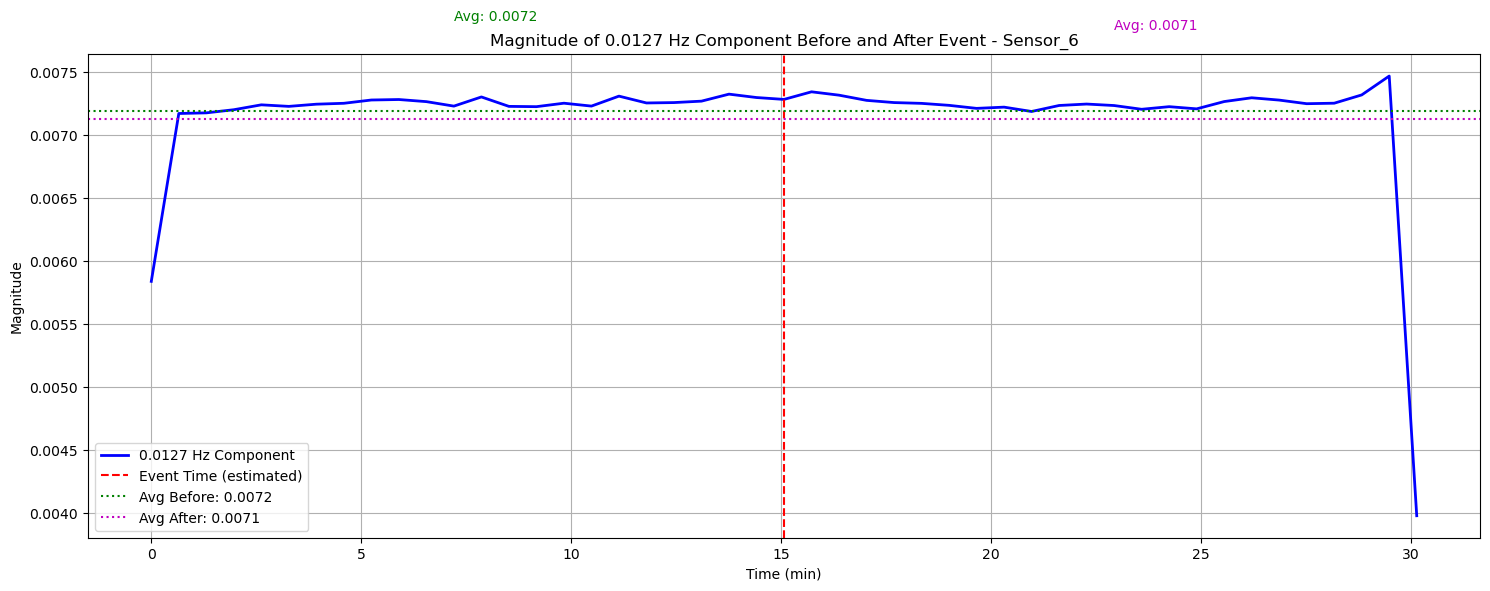


Energy Analysis:
Total energy before event: 0.0012
Total energy after event: 0.0012
Average energy before event: 0.0001
Average energy after event: 0.0001
Energy change: -0.0000 (-1.06%)


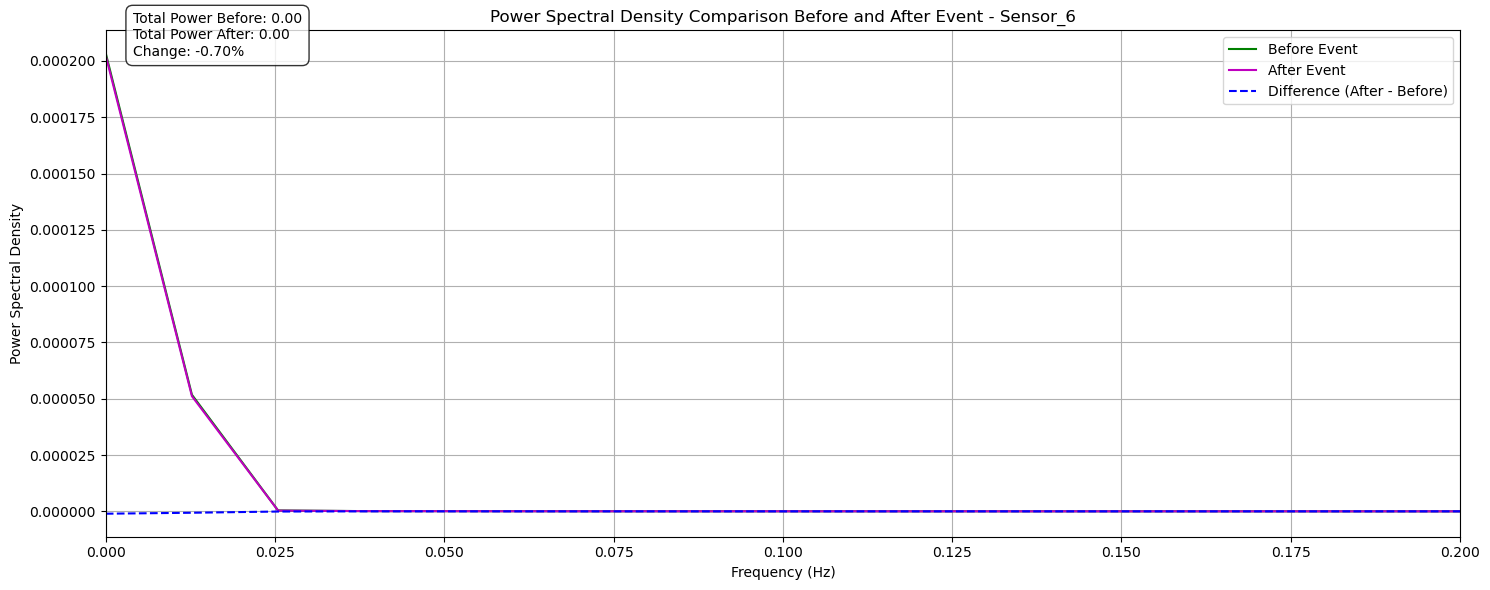


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -0.70%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
3     0.038165  1.006435e-07  1.015372e-07     8.936735e-10        0.887078
0     0.000000  2.033639e-04  2.023134e-04    -1.050485e-06       -0.516554
1     0.012722  5.176131e-05  5.113496e-05    -6.263553e-07       -1.210082
5     0.063609  3.634955e-08  3.441716e-08    -1.932392e-09       -5.301552
128   1.628394  1.356875e-10  1.230186e-10    -1.266894e-11       -5.375311

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  6.452223e-08  4.977817e-08    -1.474406e-08      -22.815775
2    0.025444  4.026771e-07  3.164218e-07    -8.625533e-08      -21.415152
6    0.076331  2.670150e-08  2.208413e-08    -4.617371e-09     

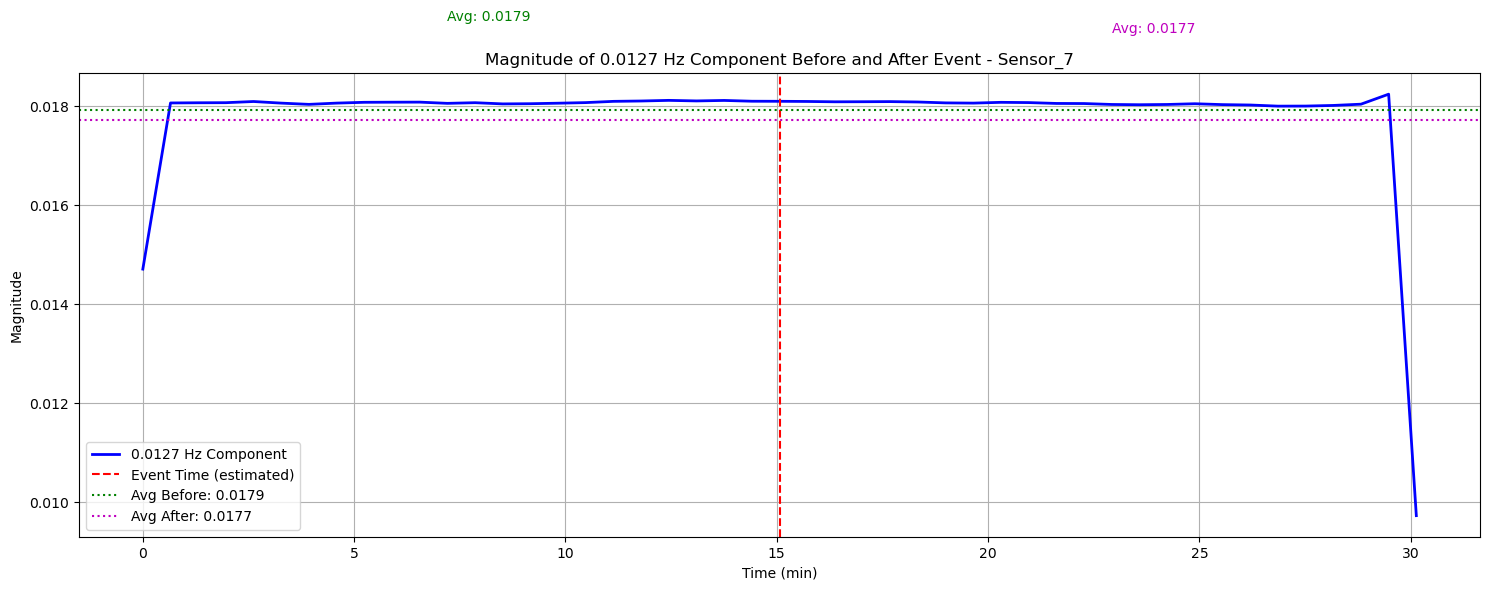


Energy Analysis:
Total energy before event: 0.0074
Total energy after event: 0.0076
Average energy before event: 0.0003
Average energy after event: 0.0003
Energy change: -0.0000 (-1.67%)


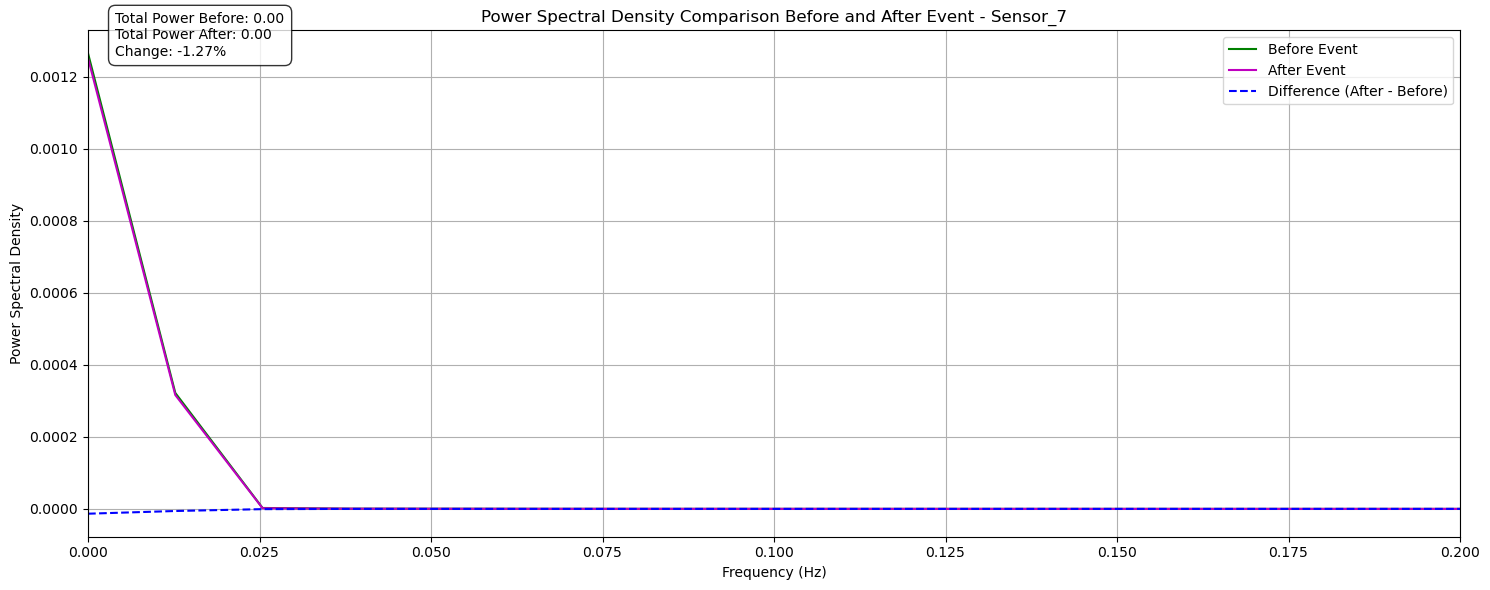


Power Spectral Density Analysis:
Total power before event: 0.0016
Total power after event: 0.0016
Absolute power change: -0.0000
Relative power change: -1.27%

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  1.265287e-03  1.251928e-03    -1.335940e-05       -1.055839
1     0.012722  3.221057e-04  3.162544e-04    -5.851374e-06       -1.816600
3     0.038165  6.390961e-07  6.084061e-07    -3.068999e-08       -4.801341
5     0.063609  2.305104e-07  2.064953e-07    -2.401502e-08      -10.413679
125   1.590228  8.561030e-10  7.209942e-10    -1.351088e-10      -14.131200

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
4    0.050887  4.092486e-07  2.989676e-07    -1.102810e-07      -26.940602
2    0.025444  2.556036e-06  1.891215e-06    -6.648217e-07      -26.008853
6    0.076331  1.695113e-07  1.323275e-07    -3.718382e-08     

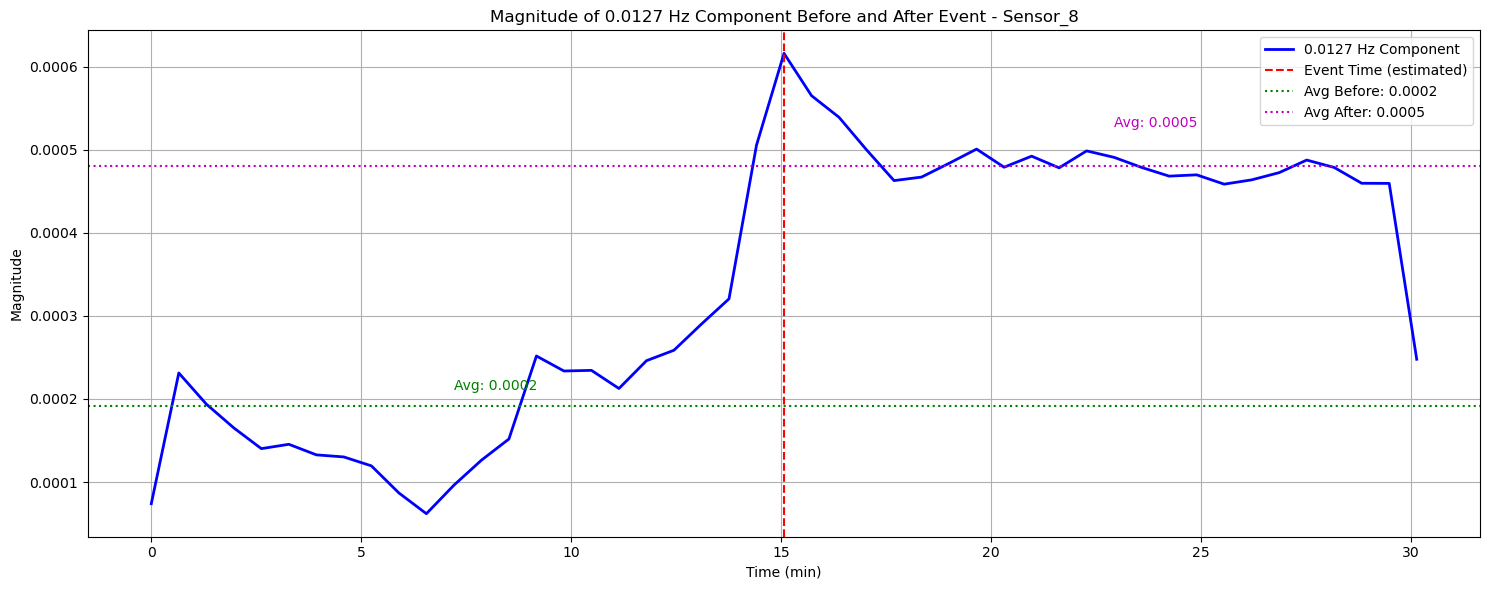


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: 0.0000 (407.22%)


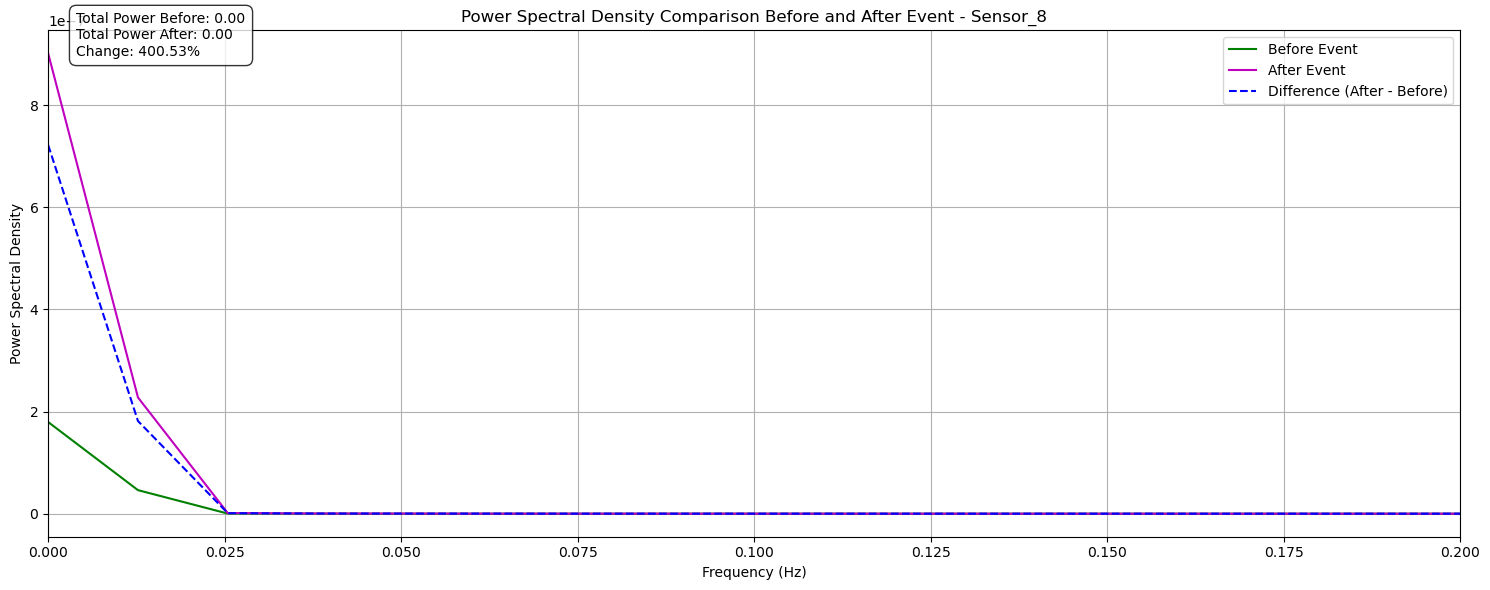


Power Spectral Density Analysis:
Total power before event: 0.0000
Total power after event: 0.0000
Absolute power change: 0.0000
Relative power change: 400.53%

Top 5 frequencies with largest power increase:
   Frequency        Before         After  Absolute_Change  Percent_Change
0   0.000000  1.795257e-07  9.015293e-07     7.220036e-07      401.949014
1   0.012722  4.613345e-08  2.276681e-07     1.815347e-07      392.647882
2   0.025444  2.421882e-10  1.251825e-09     1.009637e-09      295.053137
3   0.038165  7.535693e-11  3.989243e-10     3.235674e-10      184.519296
4   0.050887  2.724313e-11  1.974521e-10     1.702090e-10      133.766729

Top 5 frequencies with largest power decrease:
     Frequency        Before         After  Absolute_Change  Percent_Change
109   1.386679  1.025709e-12  8.894102e-13    -1.362987e-13       -0.134915
110   1.399401  8.602037e-13  1.001907e-12     1.417031e-13        0.140495
111   1.412123  7.683006e-13  1.056735e-12     2.884342e-13        0.286

In [9]:
# Analyze the target Hz frequency band before and after event for each sensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# Get dataset name from the notebook filename
notebook_name = os.path.basename(__file__) if '__file__' in globals() else 'sound_stimulation'
if notebook_name.endswith('.ipynb'):
    notebook_name = notebook_name[:-6]  # Remove .ipynb extension
if notebook_name.startswith('da_'):
    notebook_name = notebook_name[3:]  # Remove da_ prefix

# create a dict for sensors data
all_sensors_significant_changes = {}

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

# Find the event time (assuming it's at the center of the filtered data)
event_time = window_data['Timestamp'].mean()

# Loop through each voltage channel
for channel_to_analyze in voltage_columns:
    print(f"\n=== Analysis for {channel_to_analyze} ===")
    voltage_data = window_data[channel_to_analyze].values
    
    # Perform STFT for the selected channel
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Find the closest frequency to traget_freq in the STFT results
    target_freq = 0.0127218279707093
    freq_idx = np.argmin(np.abs(f - target_freq))
    actual_freq = f[freq_idx]
    print(f"Analyzing frequency: {actual_freq:.4f} Hz (closest to {target_freq} Hz)")
    
    # Extract the magnitude data for this frequency
    freq_magnitude = np.abs(Zxx[freq_idx, :])
    
    # Create a time axis in minutes for better visualization
    time_min = t / 60
    
    # Plot the magnitude of the 0.02Hz component over time
    plt.figure(figsize=(15, 6))
    
    # Plot the magnitude
    plt.plot(time_min, freq_magnitude, 'b-', linewidth=2, label=f'{actual_freq:.4f} Hz Component')
    
    # Convert event time to minutes
    event_time_min = t.mean() / 60
    plt.axvline(x=event_time_min, color='r', linestyle='--', label='Event Time (estimated)')
    
    # Calculate average magnitude before and after event
    before_mask = t < t.mean()
    after_mask = t >= t.mean()
    
    avg_before = np.mean(freq_magnitude[before_mask])
    avg_after = np.mean(freq_magnitude[after_mask])
    
    print(f"Average magnitude before event: {avg_before:.4f}")
    print(f"Average magnitude after event: {avg_after:.4f}")
    print(f"Change: {(avg_after - avg_before):.4f} ({(avg_after - avg_before)/avg_before*100:.2f}%)")
    
    # Add horizontal lines showing the average values
    plt.axhline(y=avg_before, color='g', linestyle=':', label=f'Avg Before: {avg_before:.4f}')
    plt.axhline(y=avg_after, color='m', linestyle=':', label=f'Avg After: {avg_after:.4f}')
    
    # Add annotations
    plt.annotate(f"Avg: {avg_before:.4f}", xy=(time_min[len(time_min)//4], avg_before), 
                 xytext=(time_min[len(time_min)//4], avg_before*1.1), color='g')
    plt.annotate(f"Avg: {avg_after:.4f}", xy=(time_min[3*len(time_min)//4], avg_after), 
                 xytext=(time_min[3*len(time_min)//4], avg_after*1.1), color='m')
    
    # Set axis labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude of {actual_freq:.4f} Hz Component Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate energy (integral of magnitude squared) before and after event
    energy_before = np.sum(freq_magnitude[before_mask]**2)
    energy_after = np.sum(freq_magnitude[after_mask]**2)
    
    # Normalize by the number of samples to get average energy
    num_samples_before = np.sum(before_mask)
    num_samples_after = np.sum(after_mask)
    avg_energy_before = energy_before / num_samples_before
    avg_energy_after = energy_after / num_samples_after
    
    print("\nEnergy Analysis:")
    print(f"Total energy before event: {energy_before:.4f}")
    print(f"Total energy after event: {energy_after:.4f}")
    print(f"Average energy before event: {avg_energy_before:.4f}")
    print(f"Average energy after event: {avg_energy_after:.4f}")
    print(f"Energy change: {(avg_energy_after - avg_energy_before):.4f} ({(avg_energy_after - avg_energy_before)/avg_energy_before*100:.2f}%)")
    
    # Power Spectral Density (PSD) Analysis
    # Calculate power (magnitude squared)
    power_matrix = np.abs(Zxx) ** 2
    
    # Convert time to minutes for consistency with previous plots
    time_min = t / 60
    
    # Define the event time point (assuming same as before)
    event_time_min = time_min[len(time_min) // 2]  # Middle point as event time
    
    # Create masks for before and after event
    before_mask_time = time_min < event_time_min
    after_mask_time = time_min > event_time_min
    
    # Calculate average PSD before and after event
    avg_psd_before = np.mean(power_matrix[:, before_mask_time], axis=1)
    avg_psd_after = np.mean(power_matrix[:, after_mask_time], axis=1)
    
    # Plot the power spectral density comparison
    plt.figure(figsize=(15, 6))
    plt.plot(f, avg_psd_before, 'g-', label='Before Event')
    plt.plot(f, avg_psd_after, 'm-', label='After Event')
    
    # Calculate and display the difference
    psd_diff = avg_psd_after - avg_psd_before
    plt.plot(f, psd_diff, 'b--', label='Difference (After - Before)')
    
    # Set axis labels and title
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0, 0.2)  # Limit x-axis to show only frequencies below 0.2 Hz
    plt.ylabel('Power Spectral Density')
    plt.title(f'Power Spectral Density Comparison Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    
    # Add text box with summary statistics
    total_power_before = np.sum(avg_psd_before)
    total_power_after = np.sum(avg_psd_after)
    power_change = (total_power_after - total_power_before) / total_power_before * 100
    
    stats_text = f"Total Power Before: {total_power_before:.2f}\n"
    stats_text += f"Total Power After: {total_power_after:.2f}\n"
    stats_text += f"Change: {power_change:.2f}%"
    
    plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nPower Spectral Density Analysis:")
    print(f"Total power before event: {total_power_before:.4f}")
    print(f"Total power after event: {total_power_after:.4f}")
    print(f"Absolute power change: {total_power_after - total_power_before:.4f}")
    print(f"Relative power change: {power_change:.2f}%")
    
    # Find frequency bands with the most significant changes
    freq_change_percent = (avg_psd_after - avg_psd_before) / (avg_psd_before + 1e-10) * 100  # Avoid division by zero
    significant_changes = pd.DataFrame({
        'Frequency': f,
        'Before': avg_psd_before,
        'After': avg_psd_after,
        'Absolute_Change': avg_psd_after - avg_psd_before,
        'Percent_Change': freq_change_percent
    })
    
    # store the data into dict
    all_sensors_significant_changes[channel_to_analyze] = significant_changes
    
    # Display top 5 frequencies with largest increase and decrease
    print("\nTop 5 frequencies with largest power increase:")
    print(significant_changes.sort_values('Percent_Change', ascending=False).head(5))
    
    print("\nTop 5 frequencies with largest power decrease:")
    print(significant_changes.sort_values('Percent_Change', ascending=True).head(5))


Analyzing significant changes across all sensors...


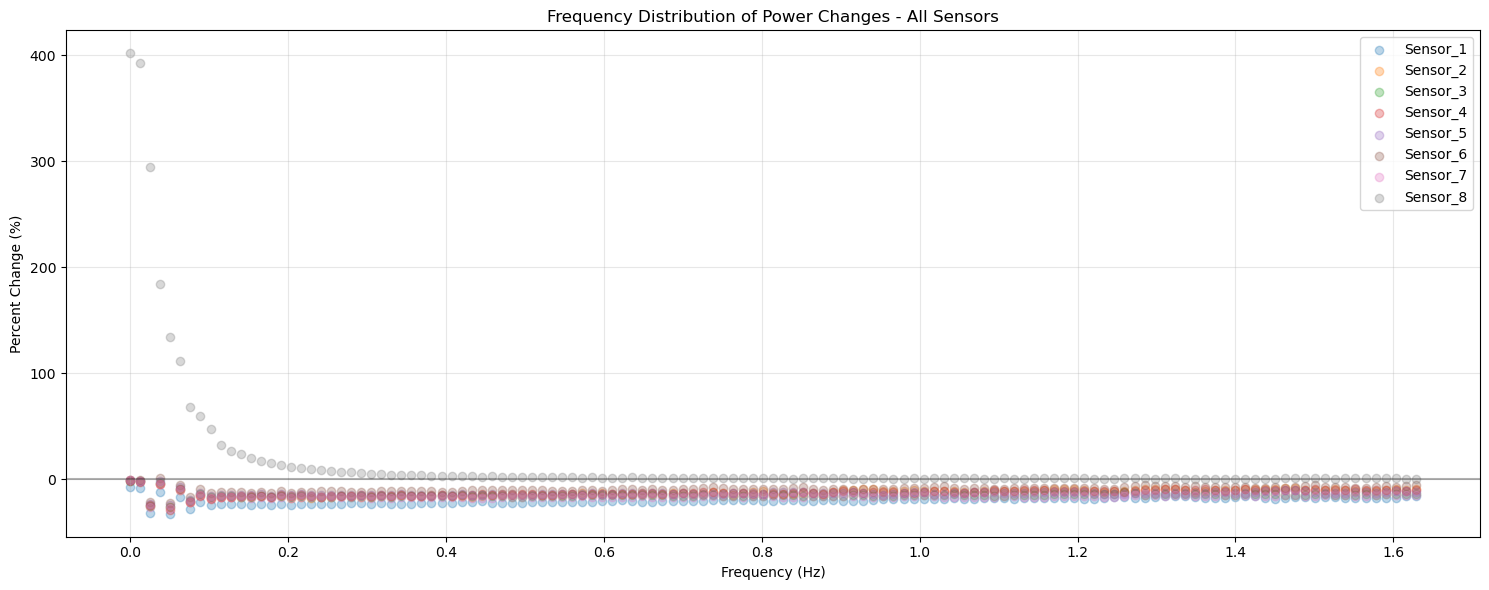


Analyzing patterns in top increases and decreases...


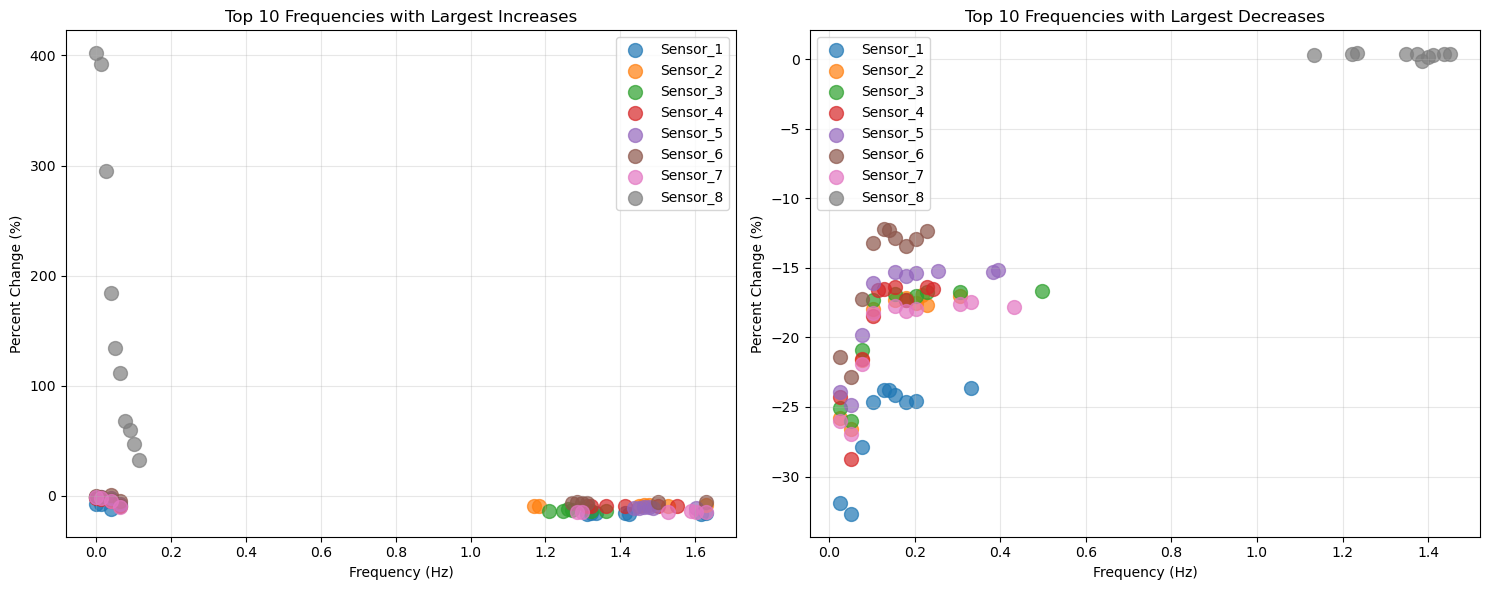


Analyzing frequency overlap between sensors...
Common frequencies showing increases across all sensors: [0.0, 0.012721827970709377, 0.03816548391212813]
Common frequencies showing decreases across all sensors: []


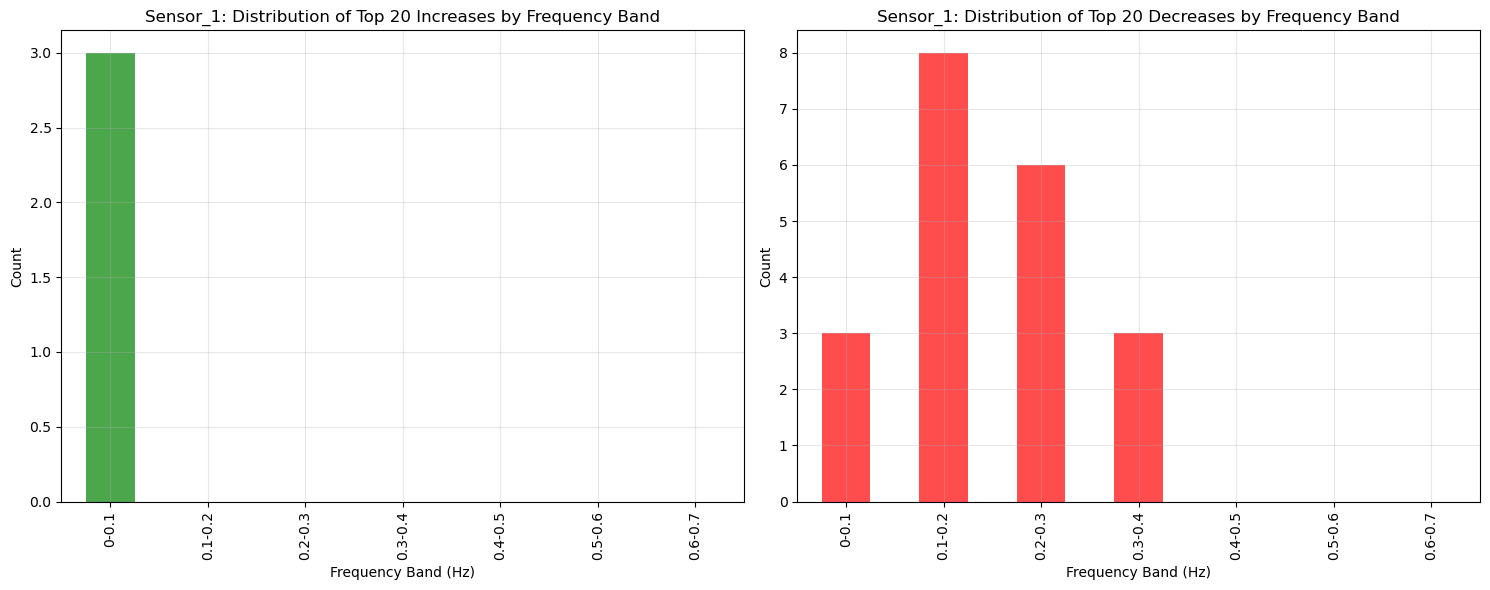

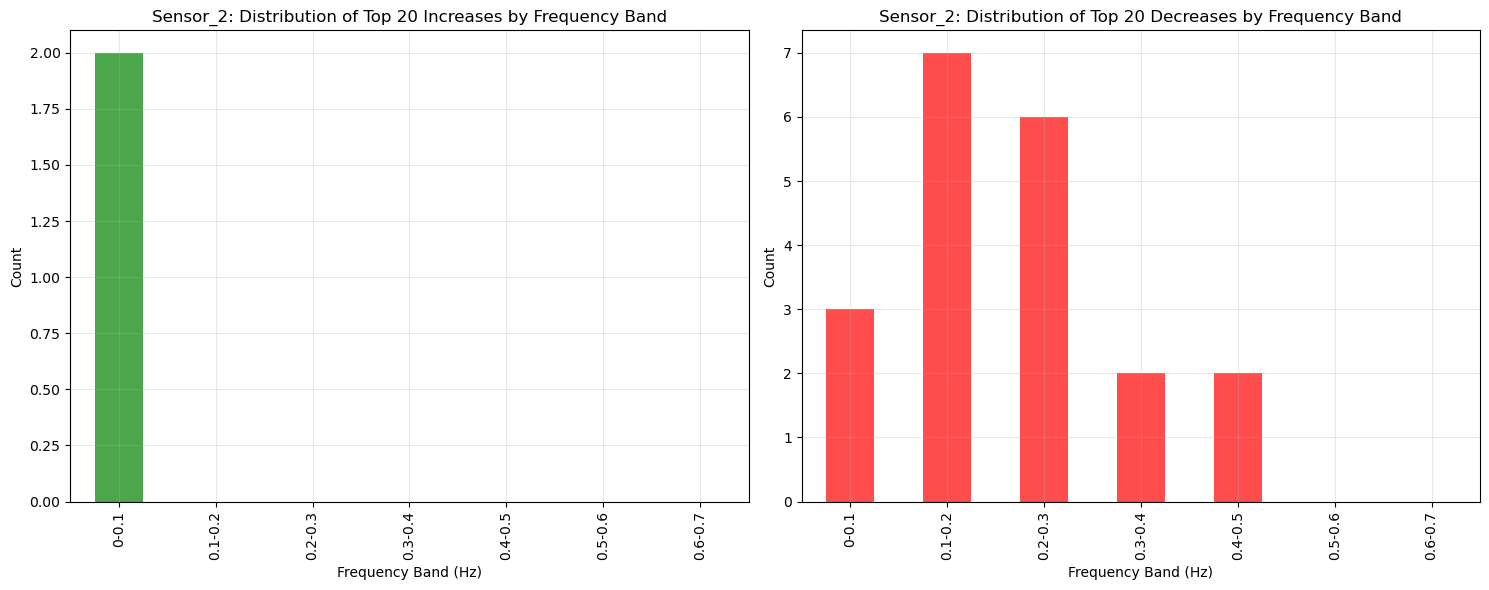

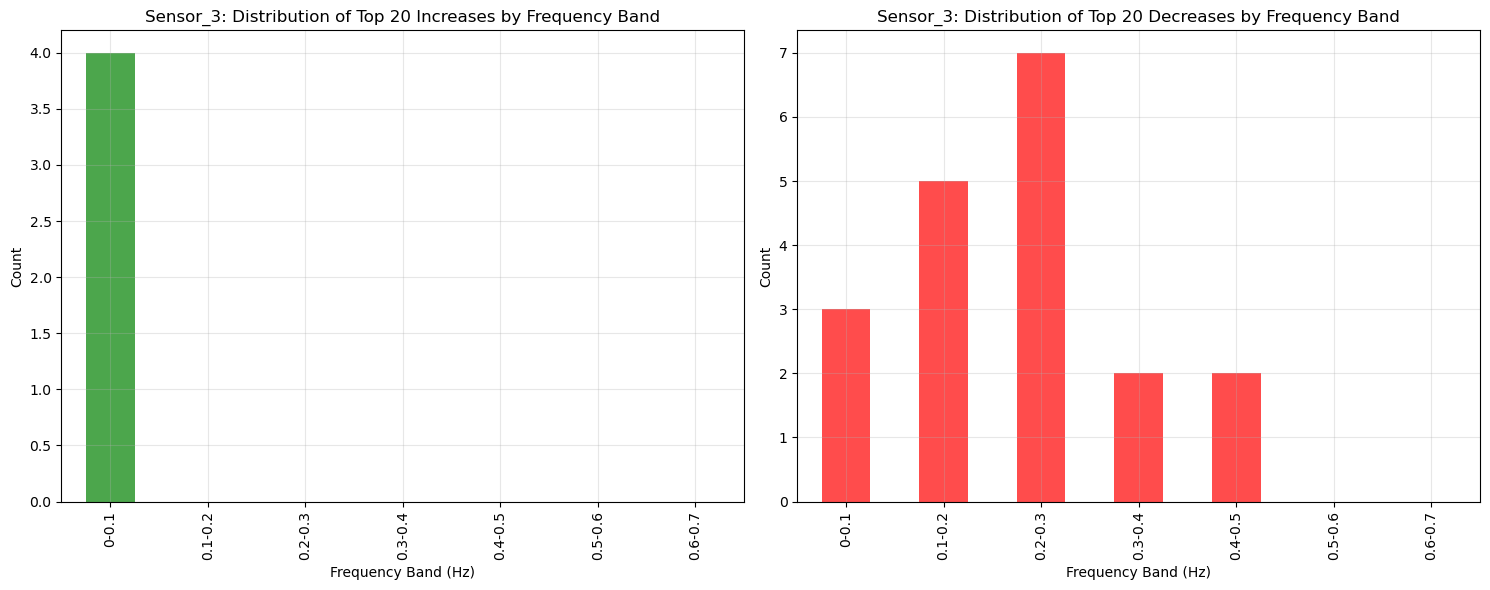

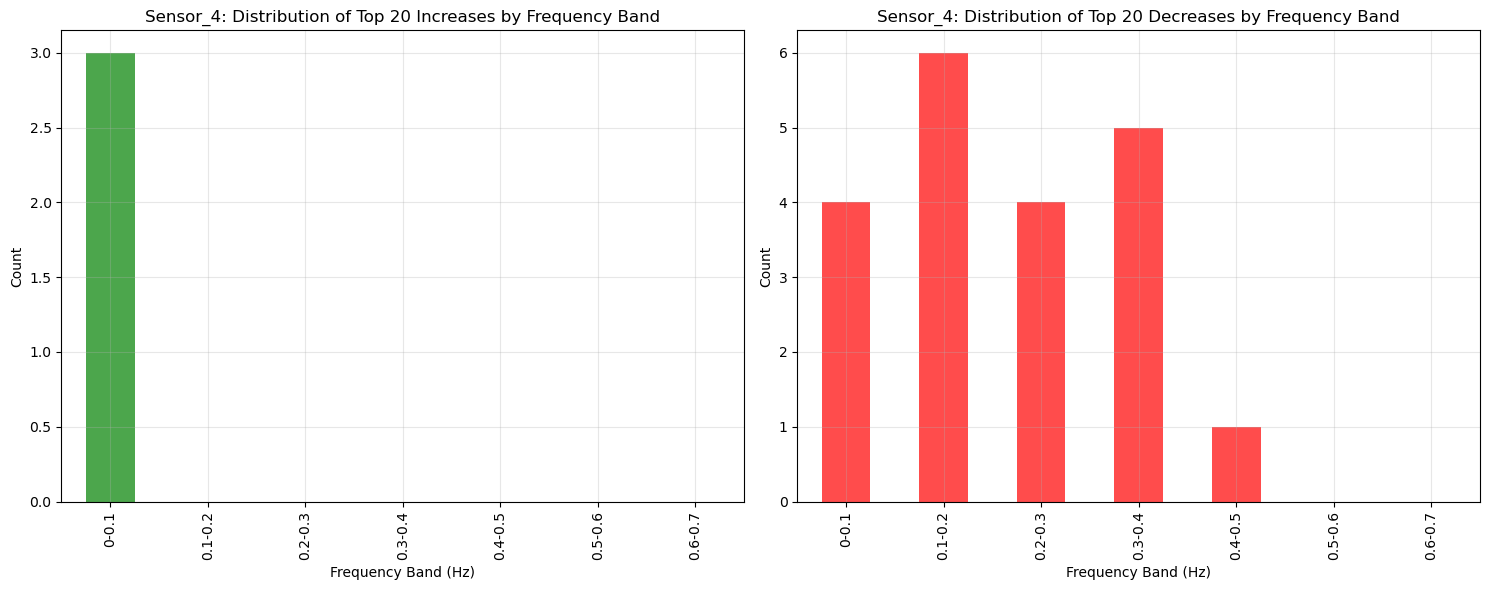

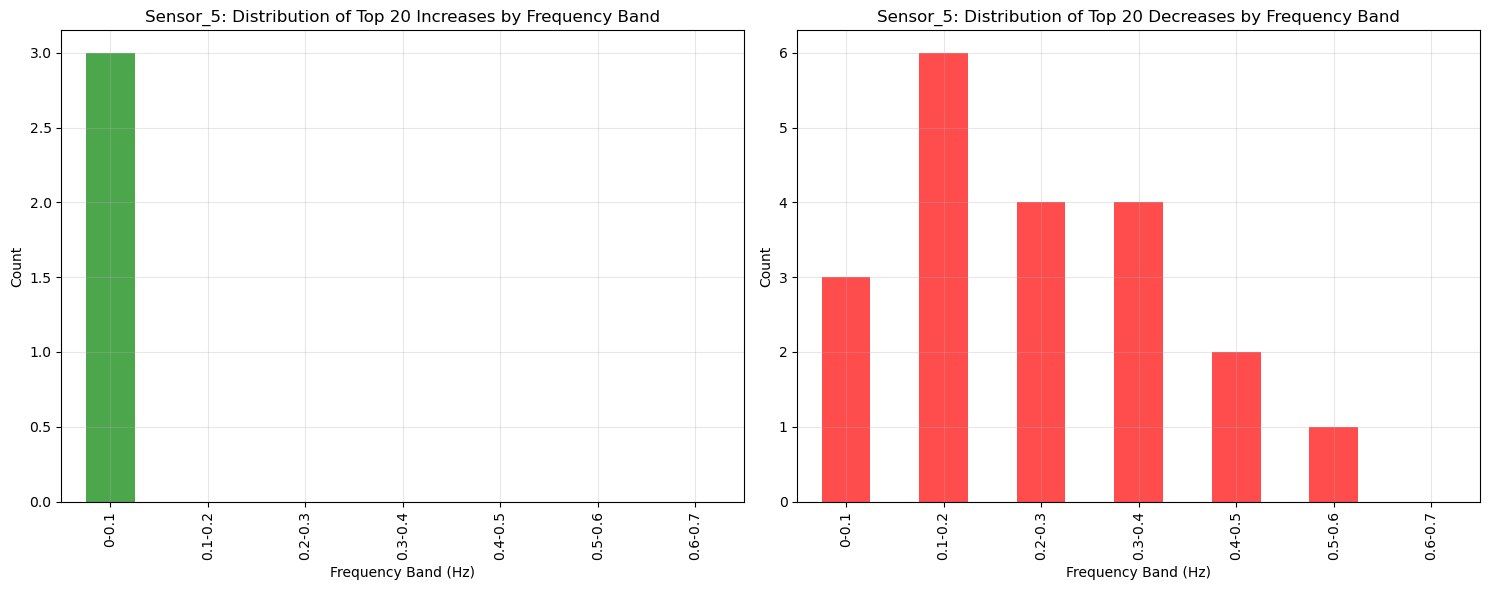

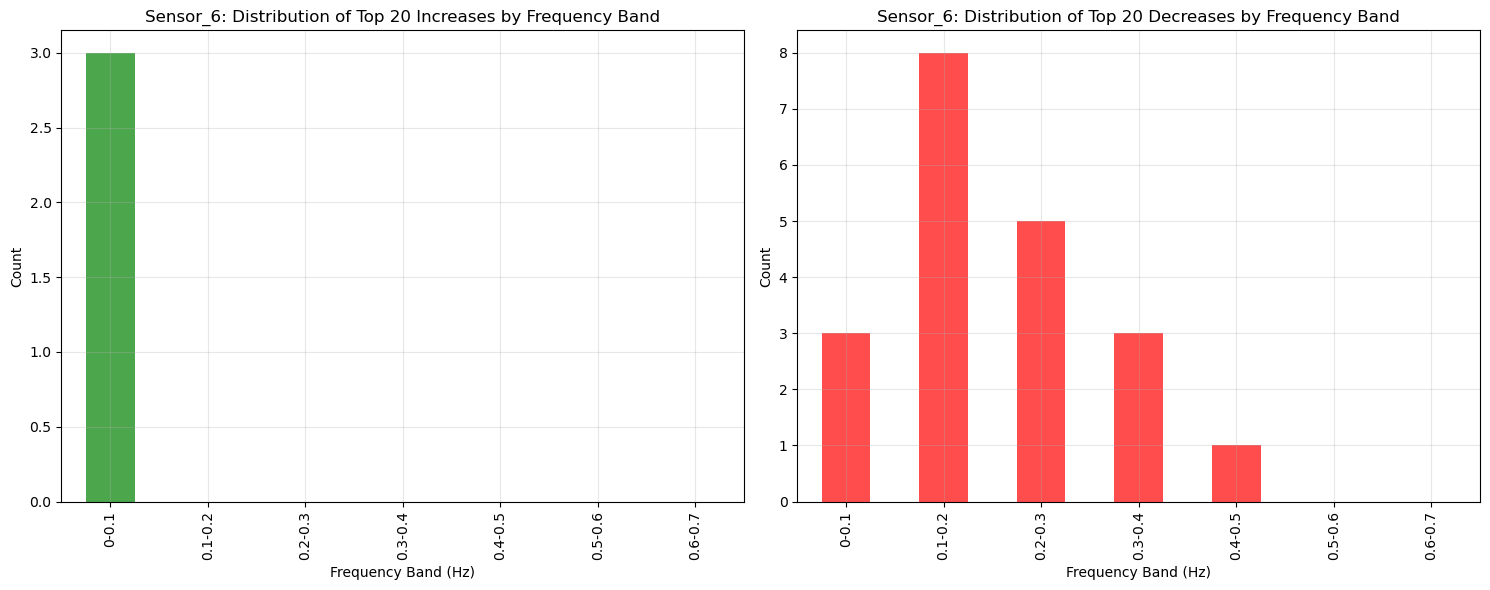

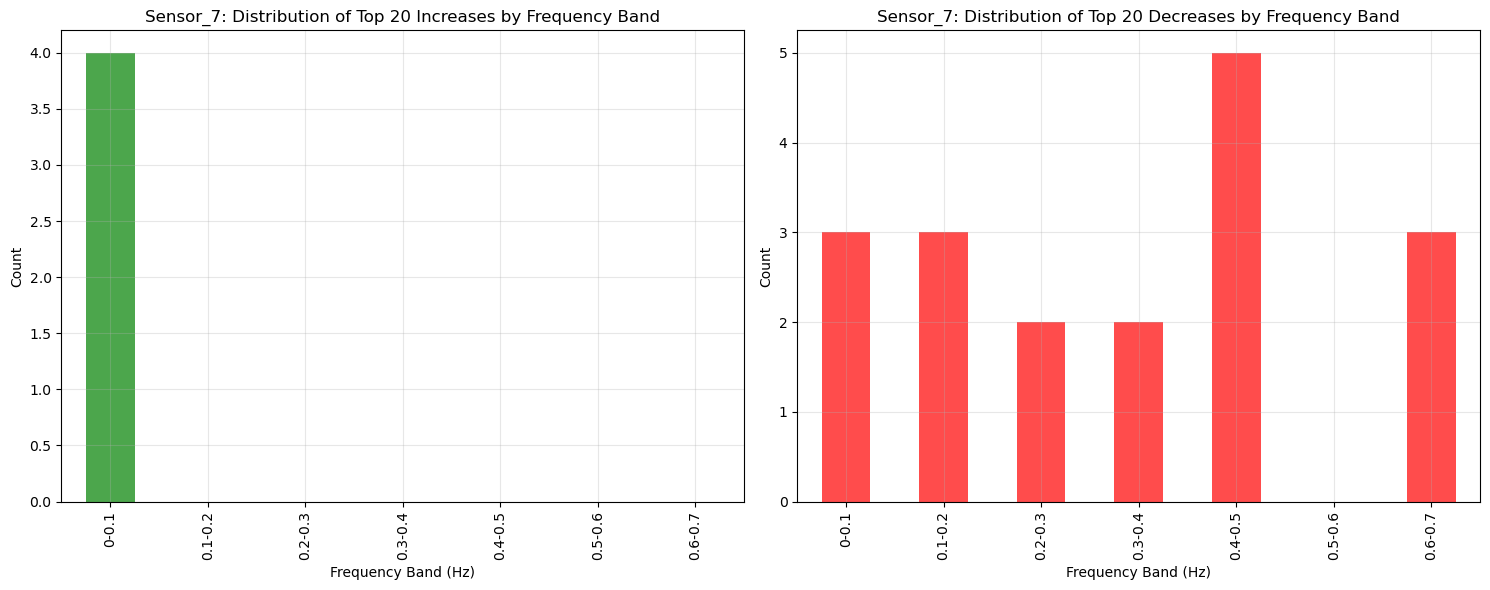

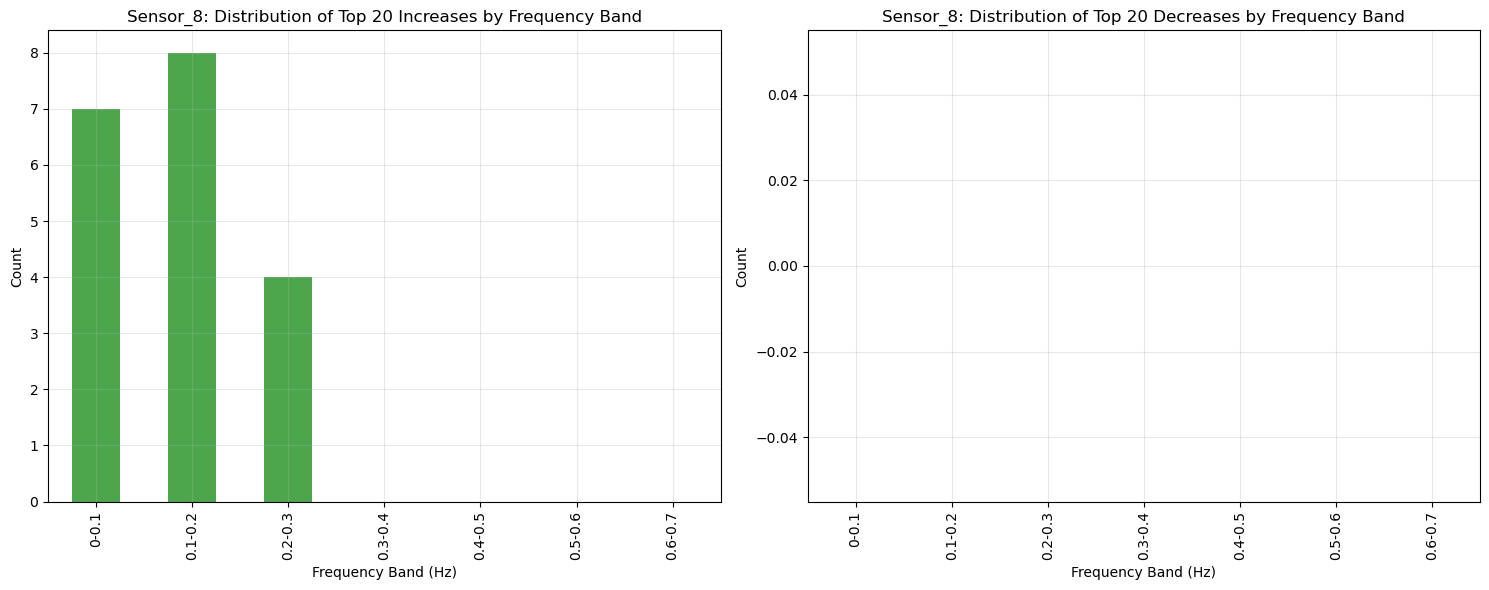

In [10]:
import seaborn as sns

# Analyze significant changes across all sensors
print("\nAnalyzing significant changes across all sensors...")

# Initialize lists to store summary data
sensor_names = []
top_increase_freqs = []
top_decrease_freqs = []
all_sensor_data = {}

# Create a figure for comparing all sensors
plt.figure(figsize=(15, 6))

# Process each sensor's data
for sensor_name, sensor_data in all_sensors_significant_changes.items():
    sensor_names.append(sensor_name)
    all_sensor_data[sensor_name] = sensor_data
    
    # Sort by absolute percent change
    sensor_data['Abs_Percent_Change'] = np.abs(sensor_data['Percent_Change'])
    
    # Get top increases and decreases
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_increase_freqs.append(top_increases['Frequency'].tolist())
    
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    top_decrease_freqs.append(top_decreases['Frequency'].tolist())
    
    # Plot frequency vs percent change for this sensor
    plt.scatter(sensor_data['Frequency'], sensor_data['Percent_Change'], 
                alpha=0.3, label=sensor_name)

# Add plot details
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.title('Frequency Distribution of Power Changes - All Sensors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze patterns in top increases and decreases
print("\nAnalyzing patterns in top increases and decreases...")

# Create figures for top increases and decreases
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(10)
    plt.scatter(top_increases['Frequency'], top_increases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)

plt.title('Top 10 Frequencies with Largest Increases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(10)
    plt.scatter(top_decreases['Frequency'], top_decreases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)

plt.title('Top 10 Frequencies with Largest Decreases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze frequency overlap between sensors for top increases and decreases
print("\nAnalyzing frequency overlap between sensors...")

# For increases
increase_overlap = set(top_increase_freqs[0])
for freqs in top_increase_freqs[1:]:
    increase_overlap = increase_overlap.intersection(set(freqs))

# For decreases
decrease_overlap = set(top_decrease_freqs[0])
for freqs in top_decrease_freqs[1:]:
    decrease_overlap = decrease_overlap.intersection(set(freqs))

print(f"Common frequencies showing increases across all sensors: {sorted(list(increase_overlap))}")
print(f"Common frequencies showing decreases across all sensors: {sorted(list(decrease_overlap))}")

# Analyze the distribution of top changes by frequency range
for sensor_name in sensor_names:
    sensor_data = all_sensor_data[sensor_name]
    
    # Define frequency bands
    sensor_data['Frequency_Band'] = pd.cut(sensor_data['Frequency'], 
                                          bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                                          labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7'])
    
    # Count top increases and decreases by frequency band
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    
    increase_band_counts = top_increases['Frequency_Band'].value_counts().sort_index()
    decrease_band_counts = top_decreases['Frequency_Band'].value_counts().sort_index()
    
    # Plot distribution of top changes by frequency band
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    increase_band_counts.plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Increases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    decrease_band_counts.plot(kind='bar', color='red', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Decreases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
